
## <center>**<u>Exploring Indian Startup Ecosystem 2018-21**</u></center>

### **Phase 1: Business Understanding**

## Abstract
This data analysis project aims to analyze the funding received by start-ups in India from 2018 to 2021. By examining data on funding amounts, start-up details, and investor information, we seek to gain valuable insights into the Indian start-up ecosystem. The project's primary goal is to propose the optimal course of action for our team's venture.

## Objectives
- Analyze start-up funding data from 2018 to 2021 to understand the trends and patterns in funding amounts received by Indian start-ups.
- Explore the characteristics of start-ups that have received substantial funding and identify factors contributing to successful funding rounds.
- Investigate the relationship between funding amounts and various start-up details, such as industry sectors, and locations.
- Propose actionable recommendations based on the data analysis findings to inform the team's strategy and course of action in the start-up ecosystem.

### **Phase 2: Data Understanding**

This phase focuses on understanding the data sources, gathering metadata, and conducting exploratory data analysis to gain insights into the data.
initiall will:
- install all the required dependencies
- import installed dependencies


Before running this code, make sure to install the required dependencies by executing:

In [1046]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


import all the necessary dependencies

In [1047]:
# Database and Environment handling
import pyodbc
from dotenv import dotenv_values 

# Analysis libraries
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
from fuzzywuzzy import process
import scipy.stats as stats
import scikit_posthocs as sp
from scikit_posthocs import posthoc_dunn

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
%matplotlib inline

# Warning libraries
import warnings
warnings.filterwarnings('ignore')

# others
import re

### **Phase 3: Data Preparation**

### Data Loading
In this step, the raw data is imported and loaded into the data analysis environment

For 2018 and 2019 data, they are csv files: 
- **startup_funding2018**
- **startup_funding2019**

For 2020 and 2021 data, 
- **SQL Server Database**

#### Load the 2018 & 2019 datasets

In [1048]:
data_2018 = pd.read_csv('./data/startup_funding2018.csv')
data_2019 = pd.read_csv('./data/startup_funding2019.csv')

#### Load the 2020 & 2021 datasets

Here are all the steps I used to correct the datasets from DB:
- Load environment variables form '.env'
- extract the required database connection details (database name, server name, username, password) from the environment variables. 
- create connection string for SQL Server using the extracted connection details
- establish a connection to the SQL Server database
- Query data from each year
- close the connection to the SQL Server database

In [1049]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('../.env')

# Extract database connection details from environment variables
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# Create the connection string for SQL Server
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Establish a connection to the SQL Server database
connection = pyodbc.connect(connection_string)

# Query data for 2020 from the database and load it into a DataFrame
query = "SELECT * FROM dbo.LP1_startup_funding2020"
data_2020 = pd.read_sql(query, connection)

# Query data for 2021 from the database and load it into a DataFrame
query = "SELECT * FROM dbo.LP1_startup_funding2021"
data_2021 = pd.read_sql(query, connection)

# Close the database connection
connection.close()

# Printing the number of rows and columns for each dataset
print("Number of rows and columns in 2020 dataset:", data_2020.shape)
print("Number of rows and columns in 2021 dataset:", data_2021.shape)


Number of rows and columns in 2020 dataset: (1055, 10)
Number of rows and columns in 2021 dataset: (1209, 9)


Set pandas display options to show all columns and rows without truncation

In [1050]:
# Show all columns
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)

#### General Overview of my datasets

In [1051]:
# overview
print("Shape of data_2018:", data_2018.shape)
print("Shape of data_2019:", data_2019.shape)
print("Shape of data_2020:", data_2020.shape)
print("Shape of data_2021:", data_2021.shape)

Shape of data_2018: (526, 6)
Shape of data_2019: (89, 9)
Shape of data_2020: (1055, 10)
Shape of data_2021: (1209, 9)


#### Initial Exploration

The approach below allows you to apply the same EDA process for all the datasets in a consistent and organized manner. It also reduces code duplication and makes your analysis more manageable.

In [1052]:
def explore_dataset(dataset_name, dataset_df):
    print(f"Exploratory Data Analysis for {dataset_name}:")
    print('=======================================')

    # Step 1: General Overview
    print(f"\nShape of {dataset_name}: {dataset_df.shape}")
    print(f"\nFew rows of {dataset_name}:")
    print('---------------------------------')
    print(dataset_df.sample(2).to_string())

    # Step 2: Summary Statistics
    print(f"\nSummary statistics for {dataset_name}:")
    print('---------------------------------')
    print(dataset_df.describe().to_string())

    # Step 3: Data Types and Missing Values
    print(f"\nData types and missing values in {dataset_name}:")
    print('---------------------------------')
    print(dataset_df.info())

    # Step 4: Unique Values and Categories
    print(f"\nNumber of unique values in each column of {dataset_name}:")
    print('------------------------------------------')
    print(dataset_df.nunique())
    print("\n\n")

 perform EDA on the  2018 dataset

In [1053]:
explore_dataset('data_2018', data_2018)

Exploratory Data Analysis for data_2018:

Shape of data_2018: (526, 6)

Few rows of data_2018:
---------------------------------
    Company Name                                           Industry     Round/Series          Amount                     Location                                                                                                                             About Company
516     LT Foods  Food and Beverage, Food Processing, Manufacturing  Post-IPO Equity  ₹1,400,000,000      New Delhi, Delhi, India                              LT Foods believe that nature will continue to nurture us until we as a species continue to breathe and live.
386  HealthifyMe                Apps, Fitness, Health Care, mHealth         Series B      $6,000,000  Bangalore, Karnataka, India  HealthifyMe is an application that allows its users to achieve their fitness and weight loss goals from their computers and smartphones.

Summary statistics for data_2018:
--------------------------------

perform EDA on the  2019 dataset

In [1054]:
explore_dataset('data_2019', data_2019)

Exploratory Data Analysis for data_2019:

Shape of data_2019: (89, 9)

Few rows of data_2019:
---------------------------------
   Company/Brand  Founded HeadQuarter     Sector                                    What it does                      Founders                 Investor    Amount($)         Stage
56         KredX      NaN   Bangalore        NaN                    Invoice discounting platform                  Manish Kumar  Tiger Global Management  $26,000,000      Series B
53        eJOHRI   2015.0      Mumbai  Jewellery  Omnichannel marketplace for gems and jewellery  Jignesh Mehta, Shailen Mehta           Rajesh Ranavat   $1,000,000  Pre series A

Summary statistics for data_2019:
---------------------------------
       Founded
count     60.0
mean    2014.5
std        2.9
min     2004.0
25%     2013.0
50%     2015.0
75%     2016.2
max     2019.0

Data types and missing values in data_2019:
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89

perform EDA on the  2020 dataset

In [1055]:
explore_dataset('data_2020', data_2020)

Exploratory Data Analysis for data_2020:

Shape of data_2020: (1055, 10)

Few rows of data_2020:
---------------------------------
    Company_Brand  Founded HeadQuarter    Sector                                                                               What_it_does                            Founders                                        Investor      Amount     Stage column10
267      Razorpay   2014.0   Bangalore   FinTech  Razorpay is a platform that enables businesses to accept, process, and disburse payments.      Harshil Mathur, Shashank Kumar  Tiger Global Management, Sequoia Capital India 100000000.0  Series D     None
596    Brainwired   2018.0      Kerala  Agritech                                          India’s first livestock health monitoring company  Sreeshankar S Nair, Romeo P Jerard  Kritik Abiram, Parthiv Rokadia, Gaurav Saraogi         NaN      None     None

Summary statistics for data_2020:
---------------------------------
       Founded        Amount
count 

perform EDA on the  2018 dataset

In [1056]:
explore_dataset('data_2021', data_2021)

Exploratory Data Analysis for data_2021:

Shape of data_2021: (1209, 9)

Few rows of data_2021:
---------------------------------
        Company_Brand  Founded HeadQuarter                            Sector                                              What_it_does            Founders           Investor    Amount Stage
469   Ourbetterplanet   2020.0   Bangalore                        E-commerce  A curated online marketplace for all things sustainable!  Pallavi Srivastava         VANS Group   $300000  Seed
1106      Alpha Coach   2021.0      Mumbai  Professional Training & Coaching                      One to One Personal Fitness Coaching    Ketan Mavinkurve  Jani Ventures INC  $1200000  None

Summary statistics for data_2021:
---------------------------------
       Founded
count   1208.0
mean    2016.7
std        4.5
min     1963.0
25%     2015.0
50%     2018.0
75%     2020.0
max     2021.0

Data types and missing values in data_2021:
---------------------------------
<class 'pandas.co

### To guide our analysis, we have formulated 5 SMART questions:
* What is the overall trend in funding received by start-ups in India from 2018 to 2021?
* Which industries or sectors have received the highest funding during this period?
* What is the distribution of startups across the cities in India?
* What is the average funding amount received by start-ups in India during this period?
* Is there a correlation between the funding amount and the number of investors involved in funding rounds?

###  We have also developed three hypotheses for testing:
Hypothesis 1:<br>
Null: The funding received by start-ups in India has not demonstrated consistent upward trajectory over the years.<br>
Alternate: The funding received by start-ups in India has demonstrated a consistent upward trajectory over the years.

Hypothesis 2: <br>
Null: There are no significant disparities in funding received by all sectors of the Indian startups. <br>
Alternate: The technology sectors receive higher funding compared to other industries.

Hypothesis 3: <br>
Null: Situating a startup in a particular city does not influence funding.<br>
Alternate: Situating a startup in a particular city significantly affects funding.

To test these hypotheses, we will conduct the following analyses: 
* For Hypothesis 1, we will analyze the year-by-year funding amounts and calculate the average growth rate of funding.
* To investigate Hypothesis 2, we will categorize start-ups based on industry and compare the funding amounts received by each sector.
* Regarding Hypothesis 3, we will examine the distribution of start-ups across cities and deduce which cities harbour most highly-funded start-ups.


### **Phase 4: Data Cleaning**

data cleaning phase is a critical step in the data preparation process. 

 It focuses on identifying and addressing issues with the quality, consistency, and completeness of the data to ensure that the data is suitable for further analysis and modeling. The primary goal of data cleaning is to improve the overall quality of the dataset and make it ready for data mining or other analytical tasks.

 Here are the key activities we will be using:
 - Data Inspections
 - Handling Outliers
 - Data Transformation
 - Handling Inconsistent Data
 - Handling Duplicated Records
 - Data integration

Data cleaning can be a time-consuming and challenging task, especially when dealing with multiple datasets. we are going to use **Reusability** approach to make the process faster and more effective

##### let's create a set of functions that perform each cleaning step

In [1057]:
############## 2018 ##############

# function to preview few rows
def preview_data(dataset, n=5):
    print(dataset.sample(n))

# function to display summary information
def display_summary(dataset):
    print(dataset.info())

# function to display unique value counts for each column
def display_unique_values(dataset):
    for col in dataset.columns: 
        print(f"Unique values for {col}:")
        print(dataset[col].values_counts())
        print("\n")

# function to handle duplicates
def handle_duplicates(dataset):
    print("Duplicate rows: ")
    duplicates = dataset[dataset.duplicated(keep=False)]
    print(duplicates)
    dataset.drop_duplicates(inplace=True)

# Function to convert Indian rupee currency to dollars
def convert_to_dollars(value):
    if '₹' in str(value):
        amount = value.replace('₹', '')
        return pd.to_numeric(amount, errors='coerce') * 0.146
    elif '$' in str(value):
        return value.replace('$', '')
    elif "—" in str(value):
        return None  # a suitable value to represent missing/invalid data
    else:
        return value
    
# Function to convert columns to numeric data type
def convert_to_numeric(column, dataset):
    dataset[column] = dataset[column].apply(convert_to_dollars)
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')

# Function to handle missing values using median imputation for 'Amount' column
def handle_missing_values_by_median(dataset, column_name):
    array = dataset[column_name].values.reshape(-1, 1)
    imputer = SimpleImputer(strategy="median")
    dataset[column_name]=imputer.fit_transform(array)

# Function to perform data uniformity
def uniform_data(dataset, Column_name):
    dataset[Column_name] = dataset[Column_name].map(lambda x: x.split(',')[0])

# Function to drop unnecessary columns
def drop_unnecessary_columns(dataset, columns_to_drop):
    dataset.drop(columns=columns_to_drop, axis=1, inplace=True)


############## 2019 ##############
# Function to check for missing values in a variable
def check_missing_values(variable):
    return variable.isnull().sum()


# Function to visualize intensity of missing values
def plot_missing_values_heatmap(dataframe):
    missing_values = dataframe.isnull()
    sns.heatmap(missing_values, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

# Function to standardize case and remove leading and trailing spaces
def clean_column_names(dataset, column_name):
    dataset[column_name] = dataset[column_name].str.title().str.strip()

# Function to handle missing values using mode imputation
def handle_missing_values_by_mode(dataset, column_name):
    array = dataset[column_name].values.reshape(-1, 1)
    imputer = SimpleImputer(strategy="most_frequent")
    dataset[column_name]=imputer.fit_transform(array)

def convert_to_int(dataset, column):
    dataset[column] = dataset[column].astype(int)
    print(dataset[column].head(3))


# Function to clean the 'Investor' column
def clean_investors(dataset):
    dataset['Investor'] = dataset['Investor'].str.strip()
    dataset['Investor'] = dataset['Investor'].str.split(',')
    dataset['Investor'] = dataset['Investor'].apply(lambda x: ' & '.join([str(name).strip() for name in x]))

# Function to clean the 'Amount($)' column
def remove_dollar_sign(dataset, column_name):
    dataset[column_name] = dataset[column_name].str.replace('$', '').replace(',', '', regex=True)


# detect outliers
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Function to remove outliers
def remove_outliers(dataset, column_name):
    q1 = dataset[column_name].quantile(0.25)
    q3 = dataset[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]
    return dataset

# Function to clean the 'Stage' column
def clean_stage(dataset):
    funding_round_replacement = {
        "Fresh funding": "Seed",
        "Seed funding": "Seed",
        # Add more funding round replacements as needed
    }
    dataset['Stage'] = dataset['Stage'].replace(funding_round_replacement)

# Function to add a column for the year of the dataset
def add_year_column(dataset, year):
    dataset['Year Funded'] = year

# Function to check the completeness of data cleaning
def check_completeness(dataset):
    missing_values = dataset.isnull().sum()
    if missing_values.any():
        print("\n\nMissing values still exist in the dataset")
    else:
        print("\n\nNo missing values found. Data cleaning is complete.")



############## 2020 ##############


# Function to handle duplicates
def handle_duplicates(dataset):
    duplicates = dataset.duplicated(keep=False)
    print("Number of duplicates:", duplicates.value_counts().loc[True])
    print("Duplicate rows:")
    print(dataset[duplicates])

# Function to drop unnecessary columns
def drop_columns(dataset, columns_to_drop):
    dataset.drop(columns=columns_to_drop, axis=1, inplace=True)

# Function to handle missing values
def handle_missing_values(dataset, column_name):
    print("Missing values before imputation:")
    print(dataset.isnull().sum())
    
    imputer = SimpleImputer(strategy="most_frequent")
    array = dataset[column_name].values.reshape(-1, 1)
    dataset[column_name] = imputer.fit_transform(array)
    
    print("Missing values after imputation:")
    print(dataset.isnull().sum())

# Function to handle inconsistent values in the 'Stage' column
def handle_inconsistent_stage(dataset):
    stage_replacements = {
        "Seed Round": "Seed",
        # Add more replacements as needed
    }
    dataset.replace({"Stage": stage_replacements}, inplace=True)



#### **Cleaning 2018 dataset**

### Preview the dataset

- look at example of records in the explore_dataset
- investigate different data types of variables in the explore_dataset


#### look at example of records

In [1058]:
preview_data(data_2018)

    Company Name                                           Industry  \
234   HealthPlix                     Fitness, Health Care, Wellness   
492          Ola  Apps, E-Commerce, Internet, Mobile, Ride Shari...   
497        Vokal                     Internet, Knowledge Management   
246      The Ken                                      Digital Media   
16        Mihuru                          Finance, Internet, Travel   

                 Round/Series    Amount                      Location  \
234                  Series A   3000000   Bangalore, Karnataka, India   
492  Venture - Series Unknown  50000000  Kormangala, Karnataka, India   
497                  Series A   1500000   Bengaluru, Karnataka, India   
246                  Series A   1500000   Bengaluru, Karnataka, India   
16                       Seed    150000    Mumbai, Maharashtra, India   

                                         About Company  
234                 HealthPlix is a healthtech startup  
492  Ola is a mobile

#### Investigate data types

### Detecting with duplicates

- check for duplicate rows
- display duplicate rows
- drop duplicates

In [1059]:
handle_duplicates(data_2018)

Number of duplicates: 2
Duplicate rows:
        Company Name                                           Industry  \
0    TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
348  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   

    Round/Series  Amount                     Location  \
0           Seed  250000  Bangalore, Karnataka, India   
348         Seed  250000  Bangalore, Karnataka, India   

                                         About Company  
0    TheCollegeFever is a hub for fun, fiesta and f...  
348  TheCollegeFever is a hub for fun, fiesta and f...  


### Data conversion
- convert Indian rupee currency to dollars

In [1060]:
convert_to_dollars(data_2018['Amount'])


0        36500.0
1            NaN
2            NaN
3       292000.0
4            NaN
         ...    
521   32850000.0
522          NaN
523       1095.0
524          NaN
525    5110000.0
Name: Amount, Length: 526, dtype: float64

### Data type conversion

Converting the column to a numeric data type

In [1061]:
convert_to_numeric('Amount', data_2018)
data_2018['Amount'].sample(5)

456   NaN
222   NaN
25    NaN
357   NaN
320   NaN
Name: Amount, dtype: float64

### Data Uniformity

- Handling data uniformity in pandas involves ensuring that the data in a DataFrame follows a consistent format or structure

In [1062]:
uniform_data(data_2018, 'Location')
data_2018['Location'].sample(5)


14     Bangalore
322    Bangalore
386    Bangalore
354        Delhi
414    Bangalore
Name: Location, dtype: object

Earlier, it was noticed that the ```Industry``` column had '-' characters which indicate the values are missing. So the missing values are going to be replaced with ```Unknown ``` value given the column is a categorical data type.

In [1063]:
#Replacing '_' with Unknown values
data_2018["Industry"]=data_2018["Industry"].replace('—', "Unknown", regex=True)
data_2018["Industry"].head(20)

0     Brand Marketing, Event Promotion, Marketing, S...
1                                  Agriculture, Farming
2      Credit, Financial Services, Lending, Marketplace
3                           Financial Services, FinTech
4                    E-Commerce Platforms, Retail, SaaS
5                      Cloud Infrastructure, PaaS, SaaS
6                        Internet, Leisure, Marketplace
7                                       Market Research
8          Information Services, Information Technology
9                                       Mobile Payments
10                                           B2B, Shoes
11                                             Internet
12    Apps, Collaboration, Developer Platform, Enter...
13                                        Food Delivery
14                                Industrial Automation
15          Automotive, Search Engine, Service Industry
16                            Finance, Internet, Travel
17    Accounting, Business Information Systems, 

### Handling missing values

Handling missing values is an essential part of data preprocessing in pandas. Missing values can be represented as NaN (Not a Number) or None in pandas

- Check for Missing Values
- Impute missing values

### Visualize missing values

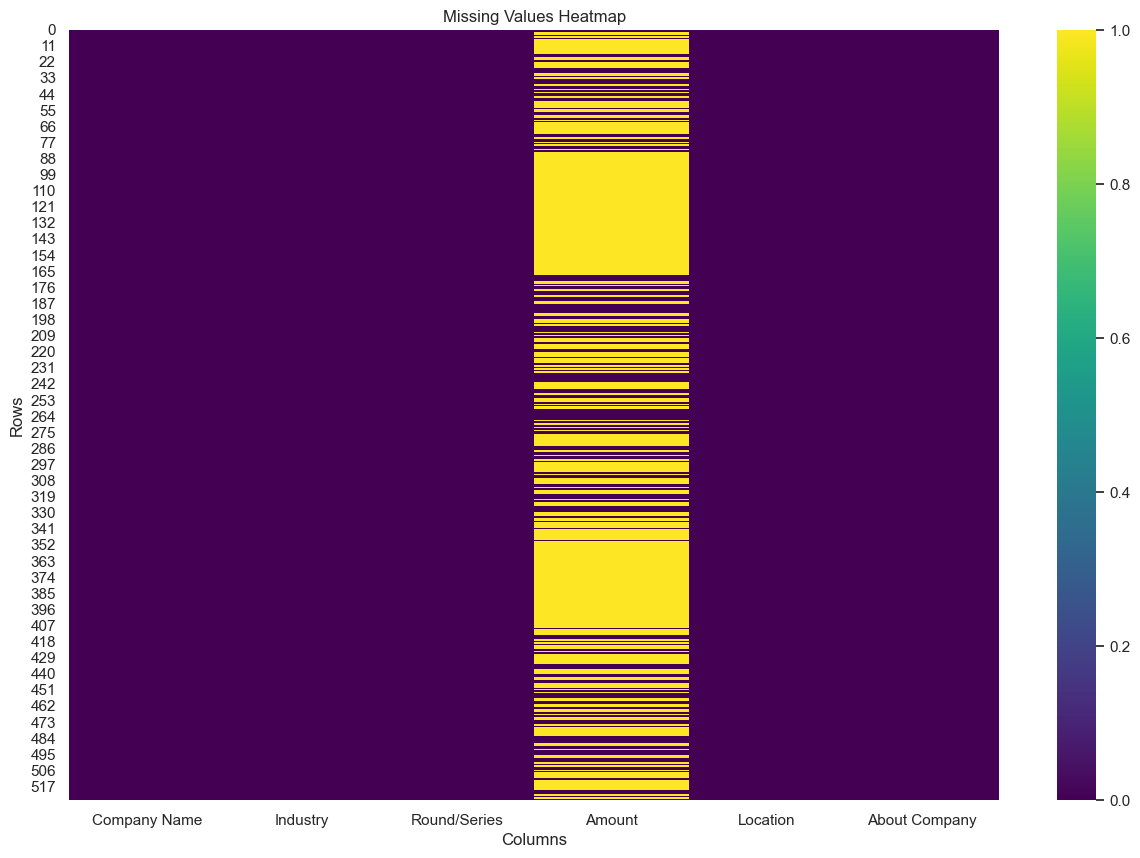

In [1064]:
plot_missing_values_heatmap(data_2018)

In [1065]:
#check for missing values
data_2018.isnull().sum()

Company Name       0
Industry           0
Round/Series       0
Amount           351
Location           0
About Company      0
dtype: int64

#### Impute missing values for Amount variable

In [1066]:
handle_missing_values_by_median(data_2018, 'Amount')
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

### Dropping Unnecessary Columns

- The column ```About Company``` won't be needed in our analysis, it will therefore be dropped.

In [1067]:
drop_unnecessary_columns(data_2018, 'About Company')

#### **Cleaning 2019 dataset**

#### Look at Example Records

In [1068]:
preview_data(data_2019)

     Company/Brand  Founded HeadQuarter           Sector  \
8        Quantiphi      NaN         NaN        AI & Tech   
78        IndyFint   2019.0   Bangalore  Virtual Banking   
0   Bombay Shaving      NaN         NaN        Ecommerce   
43         Slintel   2016.0         NaN             SaaS   
56           KredX      NaN   Bangalore              NaN   

                                         What it does            Founders  \
8   It is an AI and big data services company prov...      Renuka Ramnath   
78  It helps lenders to directly provide short-ter...   Paddy Padmanabhan   
0          Provides a range of male grooming products  Shantanu Deshpande   
43  It helps sales and marketing teams understand ...      Deepak Anchala   
56                       Invoice discounting platform        Manish Kumar   

                                Investor    Amount($)     Stage  
8   Multiples Alternate Asset Management  $20,000,000  Series A  
78                   Saravanan Adiseshan   $

#### Data-types, completeness Information

Using the Pandas "info" function, in addition to the data-type information for the dataset, we can look at counts of available records/missing records too.

In [1069]:
display_summary(data_2019)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB
None


From the summary above:
* All data types are string except the Founded column
* There are missing values in Founded, Headquarter, Sector, Founders, Stage columns


### Handling missing values

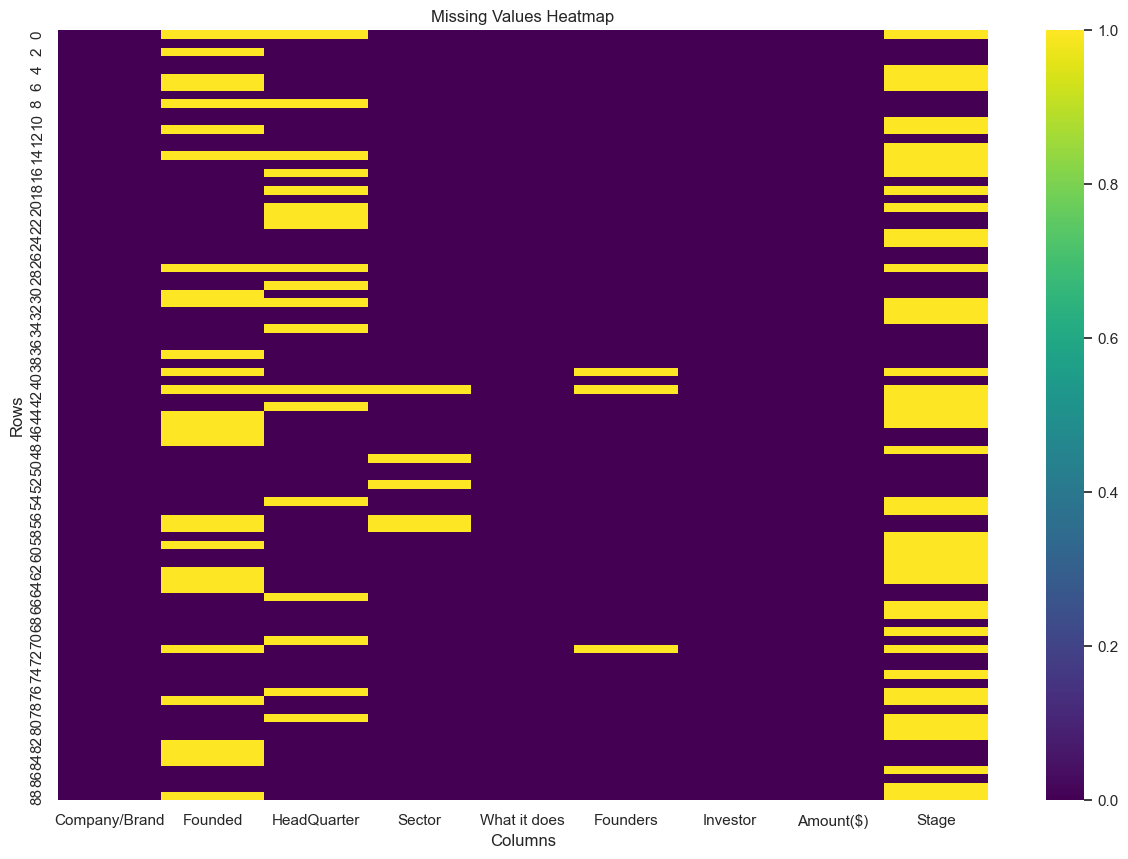

In [1070]:
plot_missing_values_heatmap(data_2019)

From the heatmap, it is clearly seen that ```Stage``` column has the most missing values followed by ```Founded``` while ```Company/Brand``` , ```What it does``` and ```Investor/Amount($)``` columns have no missing values.

#### **Company column Exploration**

Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Number of Company Names
- Remove leading, trailing spaces and Standardize case
- Handle missing values

#### Remove leading, trailing spaces and Standardize case

In [1071]:
clean_column_names(data_2019, 'Company/Brand')

#### Handle Missing Values

In [1072]:
data_2019['Company/Brand'].isnull().sum()

0

#### **Year Founded Exploration**
Data cleaning steps:
- Validate data format
- Handle missing values
- Identifying Outliers

#### Handle missing Values

In [1073]:
# Check missing values
data_2019['Founded'].isnull().sum()

29

The column ```Year Founded``` contains 29 missing values which will handle by replacing them with the mode.

In [1074]:
handle_missing_values_by_mode(data_2019, 'Founded')

Validate data format<br>
* The column will be converted into an interger from the earlier float data type.

In [1075]:
convert_to_int(data_2019, 'Founded')

0    2015
1    2014
2    2015
Name: Founded, dtype: int32


#### **Headquarter Exploration**

Data cleaning steps:
- Remove leading, trailing spaces and Standardize case
- Handle missing values
- Number of cities
- Examine the most common cities
Remove leading, trailing spaces and Standardize case

Remove leading, trailing spaces and Standardize case

In [1076]:
clean_column_names(data_2019, 'HeadQuarter')

Handle the missing Values

In [1077]:
data_2019['HeadQuarter'].isnull().sum()

19

The columns contains 19 missing values which will replace with 'Unknown' .

In [1078]:
# fill the null categorical values with 'Unknown'
data_2019['HeadQuarter'] = data_2019['HeadQuarter'].fillna('Unknown')
data_2019['HeadQuarter'].isnull().sum()

0

#### **Explore Sector**

Data Cleaning Steps:
- Clean sector name
- Remove leading, trailing spaces and Standardize case
- Handle missing values

#### clean Sector Name

In [1079]:
# cleaning sectory names
sector_replacements = {
    'AI & Tech': 'AI',
    'Ai': 'AI',
    'Automobile & Technology': 'Automobile',
    'Automotive tech': 'Automobile',
    'Automotive Tech': 'Automobile',
    'B2B Supply Chain': 'B2B',
    'E-commerce & AR': 'E-commerce',
    'E-commerce & Ar': 'E-commerce',
    'E-Commerce & Ar': 'E-commerce',
    'Ecommerce': 'E-commerce',
    'Food & Nutrition': 'Food',
    'Food & tech': 'Food',
    'Food & Tech': 'Food',
    'Food Tech': 'Food',
    'Foodtech': 'Food',
    'Games': 'Gaming',
    'Healthcare': 'Health',
    'Healthtech': 'Health',
    'Manufacturing': 'Industrial',
    'Marketing & Customer loyalty': 'Marketing',
    'Marketing & Customer Loyalty': 'Marketing',
    'Pharmaceutical': 'Pharma',
    'Robotics & AI': 'AI',
    'Robotics & Ai': 'AI',
    'SaaS': 'Software',
    'Safety tech': 'Security',
    'Social Media': 'SocialMedia',
    'Transport & Rentals': 'Transportation',
    'Virtual Banking': 'Banking',
    'Yoga & wellness': 'Wellness',
    'Hr Tech': "Human Resource",
    'Ai & Tech': 'AI',
}
data_2019['Sector'] = data_2019['Sector'].replace(sector_replacements)

Remove leading, trailing spaces and Standardize case

In [1080]:
clean_column_names(data_2019, 'Sector')

Handle missing values

In [1081]:
# Handle missing values
data_2019['Sector'] = data_2019['Sector'].fillna('Unknown')

# check missing values
data_2019['Sector'].isnull().sum()

0

#### **Explore Investor**

Data Cleaning Steps:
- Remove leading, trailing spaces and Standardize case
- Handle missing values

Remove leading, trailing spaces and Standardize case

In [1082]:
clean_column_names(data_2019, 'Investor')

#### Check missing values

In [1083]:
data_2019['Investor'].isnull().sum()

0

#### **Explore Funding Amount**

Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Remove and replacing empty spaces, leading and trailing spaces
- Handle missing values
- Visualize the distribution
- Detecting and removing Outliers

In [1084]:

data_2019['Amount($)']

0       $6,300,000
1     $150,000,000
2      $28,000,000
3      $30,000,000
4       $6,000,000
          ...     
84     $20,000,000
85    $693,000,000
86      $5,000,000
87     $50,000,000
88     $33,000,000
Name: Amount($), Length: 89, dtype: object

Remove dollar sign

In [1085]:
# Remove the dollar sign
remove_dollar_sign(data_2019, 'Amount($)')

# Cleaning the Funding Amount ($)
data_2019['Amount($)'] = pd.to_numeric(data_2019['Amount($)'], errors='coerce')

Handle Undisclosed Values

In [1086]:
# handling undisclosed
data_2019['Amount($)'] = data_2019['Amount($)'].replace('Undisclosed', np.nan)

In [1087]:
# Create an instance of the SimpleImputer with the median strategy
handle_missing_values_by_median(data_2019, 'Amount($)')
data_2019['Amount($)'].isnull().sum()

0

Detecting and removing Outliers

In [1088]:
data_2019['Amount($)'].describe()

count          89.0
mean     38297002.2
std     103599437.8
min        100000.0
25%       4000000.0
50%       6000000.0
75%      26000000.0
max     693000000.0
Name: Amount($), dtype: float64

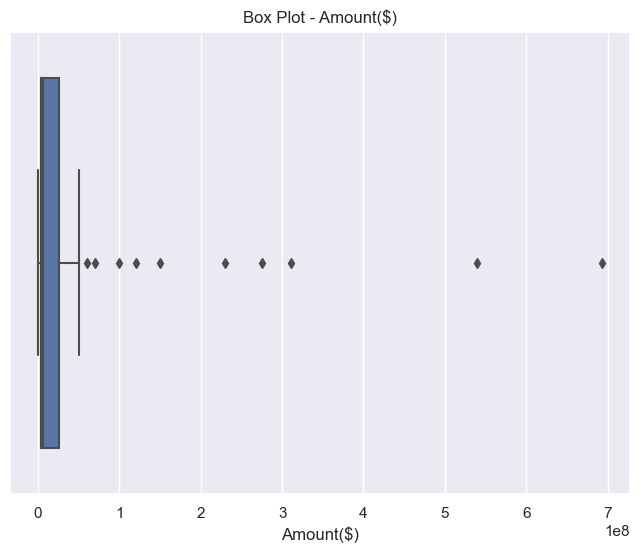

In [1089]:
# Box Plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_2019['Amount($)'])
plt.title('Box Plot - Amount($)')
plt.xlabel('Amount($)')
plt.show()

#### Handle Outliers

In [1090]:
# Detecting outliers:
outliers = detect_outliers(data_2019, 'Amount($)')
print("Number of Outliers: {}".format(len(outliers)))
print()

# removing outliers:
data_2019 = data_2019[~data_2019['Amount($)'].isin(outliers['Amount($)'])]

# Verify if outliers were handled
outliers_after_handling = detect_outliers(data_2019, 'Amount($)')
print("Number of Outliers after Handling: {}".format(len(outliers_after_handling)))

Number of Outliers: 10

Number of Outliers after Handling: 7


After handling the outliers

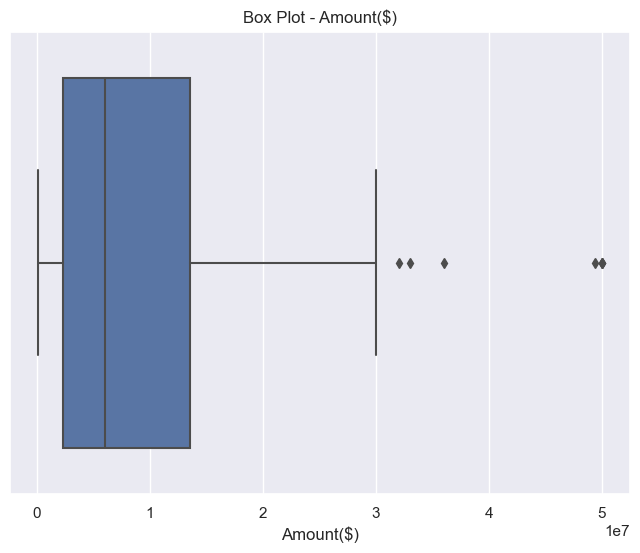

In [1091]:
# Box Plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_2019['Amount($)'])
plt.title('Box Plot - Amount($)')
plt.xlabel('Amount($)')
plt.show()

In [1092]:
# Detecting outliers:
outliers = detect_outliers(data_2019, 'Amount($)')
print("\nNumber of Outliers reduced to: {}".format(len(outliers)))
print()


Number of Outliers reduced to: 7



#### **Explore Stage**

Clean Funding Round names

In [1093]:
data_2019["Stage"].value_counts()

Stage
Series A         10
Pre series A      8
Series B          8
Series D          2
Series C          2
Fresh funding     1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64

In [1094]:
#cleaning Funding round names
funding_round_replacement = {
    "Fresh funding" :"Seed",
    "Seed funding":"Seed",
    "Seed fund" :"Seed",
    "Pre series A": "Pre-series A",
    "Series B+" : "Series B",
    "Seed round" :"Seed"}
data_2019['Stage'] = data_2019['Stage'].replace(funding_round_replacement)

In [1095]:
data_2019["Stage"].value_counts()

Stage
Series A         10
Pre-series A      9
Series B          9
Seed              4
Series D          2
Series C          2
Post series A     1
Series E          1
Series F          1
Name: count, dtype: int64

#### Handle missing values

In [1096]:
# Check missing values
check_missing_values(data_2019['Stage'])

40

The column contains 40 missing values which will handle by filling them in with 'Unknown' value.

In [1097]:
data_2019['Stage'] = data_2019['Stage'].fillna('Unknown')

Dropping columns
- The ```What it does``` and ```Founders``` column won't be needed in our analysis therefore they will drop them.

In [1098]:
#Dropping columns
data_2019.drop(['What it does', 'Founders'],axis=1, inplace=True)

**Preview after Data cleaning**

check for any missing values in the dataset



 No missing values found. Data cleaning is complete


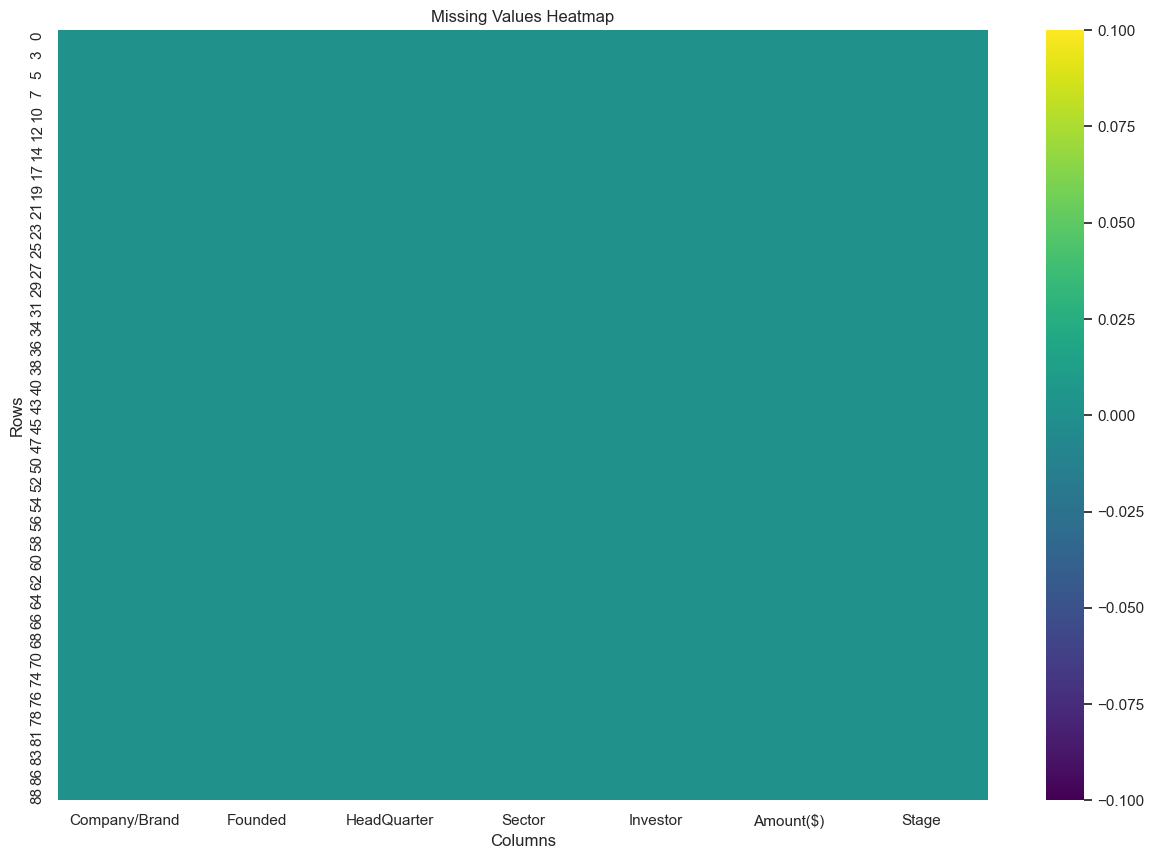

In [1099]:
# check for any missing values
missing_values = data_2019.isnull().sum()
if missing_values.any():
    print("\n\nMissing values still exist in the dataset")
else:
    print("\n\n No missing values found. Data cleaning is complete")

# plot missing values
plot_missing_values_heatmap(data_2019)

#### Check for Duplicates

In [1100]:
duplicates = data_2019.duplicated()
if duplicates.any():
    print("\n\nDuplicate records still exist in the dataset.")
else:
    print("\n\nNo duplicate records found. Data cleaning is complete.")




No duplicate records found. Data cleaning is complete.


In [1101]:
#Creating a column named 'Year Funded'
data_2019['Year Funded'] = 2019
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount($),Stage,Year Funded
0,Bombay Shaving,2015,Unknown,E-Commerce,Sixth Sense Ventures,6300000.0,Unknown,2019
2,Eduisfun,2015,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Seed,2019
3,Homelane,2014,Chennai,Interior Design,"Evolvence India Fund (Eif), Pidilite Group, Fj...",30000000.0,Series D,2019
4,Nu Genes,2004,Telangana,Agritech,Innovation In Food And Agriculture (Ifa),6000000.0,Unknown,2019
5,Flytbase,2015,Pune,Technology,Undisclosed,6000000.0,Unknown,2019


#### <center>**Cleaning 2020 dataset**</center>

<h4>Data Exploration. The columns in the data are:</h4>
<div>
<li style="list-style: none;">
<ol>Company_Brand</ol>
<ol>Founded</ol>
<ol>HeadQuarter</ol>
<ol>Sector</ol>
<ol>What_it_does</ol>
<ol>Founders</ol>
<ol>Investor</ol>
<ol>Amount</ol>
<ol>Stage</ol>
<ol>column10</ol>
</li>
</div>


In [1102]:
#display the columns in the dataframe
data_2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [1103]:
#shape of the data
data_2020.shape

(1055, 10)

In [1104]:
#display the summary of the data
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


From the summary above:
* All columns are string data type except ```Founded``` and ```Amount```
* All columns contain missing values except for ```Company Name``` and ```What_it_does```

In [1105]:
#Overview of column 10
data_2020['column10']

0       None
1       None
2       None
3       None
4       None
        ... 
1050    None
1051    None
1052    None
1053    None
1054    None
Name: column10, Length: 1055, dtype: object

In [1106]:
#Overview of column 10
data_2020['Founded']

0      2019.0
1      2019.0
2      2018.0
3      2020.0
4      2016.0
        ...  
1050      NaN
1051      NaN
1052   2012.0
1053   2015.0
1054   2017.0
Name: Founded, Length: 1055, dtype: float64

#### Dealing with duplicates

In [1107]:
data_2020.duplicated().value_counts()

False    1052
True        3
Name: count, dtype: int64

The 2020 data contains 3 duplicates which will later drop

In [1108]:
#print out all the duplicates next to each other
data_2020[data_2020.duplicated(keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
120,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
129,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
326,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None


In [1109]:
#Drop the duplicate
data_2020=data_2020.drop_duplicates()

#Confirming the duplicates are dealt with
data_2020.duplicated().value_counts()

False    1052
Name: count, dtype: int64



<h3>Decisions made:</h3>

* Change the ```Founded``` column to numerical data type.
* Drop ```column 10``` 
* Handle missing values









In [1110]:
#drop the column named column 10
# Assuming data2020 is your DataFrame and 'column_name' is the column you want to drop
data_2020=data_2020.drop(['column10'],axis=1)
data_2020.head()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None


#### Handling missing values

In [1111]:
#Checking missing values
data_2020.isnull().sum()

Company_Brand      0
Founded          213
HeadQuarter       94
Sector            13
What_it_does       0
Founders          12
Investor          38
Amount           253
Stage            462
dtype: int64

In [1112]:
#Imputing missing values in the Founded column using simple imputer method with most frequest value
array= data_2020["Founded"].values.reshape(-1,1)
imputer=SimpleImputer(strategy="most_frequent")

data_2020["Founded"]=imputer.fit_transform(array)



In [1113]:
#Statistical summary for Amount column
data_2020["Amount"].describe()

count           799.0
mean      112699397.5
std      2479695497.0
min           12700.0
25%         1000000.0
50%         3000000.0
75%        11000000.0
max     70000000000.0
Name: Amount, dtype: float64

For the ```Amount``` column the missing values will be replaced using the median since it is less sensitive to outliers than the mean.

In [1114]:
#Imputing missing values in the amount column using simple imputer method
array= data_2020["Amount"].values.reshape(-1,1)
imputer=SimpleImputer(strategy="median")

data_2020["Amount"]=imputer.fit_transform(array)


In [1115]:
#Confirming the missing values are dealt with for the Amount and Founded column
data_2020.isnull().sum()

Company_Brand      0
Founded            0
HeadQuarter       94
Sector            13
What_it_does       0
Founders          12
Investor          38
Amount             0
Stage            462
dtype: int64

Given the other columns with missing values are catergorical, they will be replaced using "Undisclosed" value.

In [1116]:
data_2020=data_2020.fillna("Undisclosed")
data_2020.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

#### Data uniformity
There some values in the ```Stage``` column which have different casing therefore all the values will be made consistent and uniform.


In [1117]:
#Overview of the Stage column
data_2020["Stage"].value_counts()

Stage
Undisclosed              462
Series A                  96
Seed                      79
Seed Round                69
Series B                  57
Pre series A              54
Pre-series A              53
Series C                  50
Series D                  22
Debt                      18
Pre Series A              12
Pre-seed                  11
Seed round                 9
Bridge                     6
Series E                   6
Pre-series B               4
Series F                   4
Pre seed round             4
Angel Round                4
Pre-Seed                   2
Pre series B               2
Pre-seed Round             2
Seed funding               2
Seed Funding               2
Pre-series C               2
Series B2                  2
Pre-Series B               2
Seed Round & Series A      1
Series C, D                1
Mid series                 1
Series D1                  1
Seed Investment            1
Pre series C               1
Pre-series                 1
Bridge R

In [1118]:
#Handling the inconsistent values 
data_2020.replace({"Stage": {"Seed Round" : "Seed",
                            "Pre series A": "Pre-series A",
                            "Pre Series A" : "Pre-series A" ,
                            "Seed round" :   "Seed",
                            "Pre seed round" :"Pre-seed",
                            "Series B2" :    "Series B",
                            "Pre series B" : "Pre-series B",
                            "Seed Funding" : "Seed",
                            "Pre-Series B" : "Pre-series B",
                            "Pre-Seed"  :    "Pre-seed",
                            "Seed funding" : "Seed",
                            "Pre-seed Round" :"Pre-seed",
                            "Series E2" :     "Series E",
                            "Pre series A1" : "Pre-series A",
                            "Series D1" :     "Series",
                            "Pre seed Round" :"Pre-seed",
                            "Pre series C"  : "Pre-Series C",
                            "Bridge Round" :  "Bridge",
                            "Series A-1" :    "Series",
                            "Pre- series A":  "Pre-series A",
                            "Seed Investment" :"Seed"}},inplace =True)

In [1119]:
#Confirming data uniformity
data_2020["Stage"].value_counts()

Stage
Undisclosed              462
Seed                     162
Pre-series A             121
Series A                  96
Series B                  59
Series C                  50
Series D                  22
Pre-seed                  20
Debt                      18
Pre-series B               8
Series E                   7
Bridge                     7
Series F                   4
Angel Round                4
Pre-series C               2
Series                     2
Pre-series                 1
Edge                       1
Series H                   1
Seed A                     1
Seed Round & Series A      1
Pre-Series C               1
Mid series                 1
Series C, D                1
Name: count, dtype: int64

In the ```HeadQuarter``` column,there were locations outside India yet our analysis focuses on India .Therefore , the locations will be named outside India.

In [1120]:
data_2020.loc[data_2020['HeadQuarter'] == 'San Francisco, California, United States', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'London, England, United Kingdom', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'San Francisco Bay Area, Silicon Valley, West Coast', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'New York, United States', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'San Francisco, United States', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Tirunelveli, Tamilnadu', 'HeadQuarter'] = 'Chennai'
data_2020.loc[data_2020['HeadQuarter'] == 'Tangerang, Jawa Barat, Indonesia', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'San Ramon, California ', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Frisco, Texas, United States ', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Paris, Ile-de-France, France', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Plano, Texas, United States', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Palmwoods, Queensland, Australia', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'France', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'San Ramon, California', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'San Francisco Bay Area, West Coast, Western US', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Trivandrum, Kerala, India', 'HeadQuarter'] = 'Trivandrum'
data_2020.loc[data_2020['HeadQuarter'] == 'Samastipur, Bihar', 'HeadQuarter'] = 'Samastipur'
data_2020.loc[data_2020['HeadQuarter'] == 'Irvine, California, United States', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Tumkur, Karnataka', 'HeadQuarter'] = 'Tumkur'
data_2020.loc[data_2020['HeadQuarter'] == 'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Shanghai, China', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Jiaxing, Zhejiang, China', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Sydney, New South Wales, Australia', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'California', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Singapore', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'San Francisco', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Jaipur, Rajastan', 'HeadQuarter'] = 'Jaipur'
data_2020.loc[data_2020['HeadQuarter'] == 'San Franciscao', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Sydney', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Dhingsara, Haryana', 'HeadQuarter'] = 'Dhingsara'
data_2020.loc[data_2020['HeadQuarter'] == 'Bangaldesh', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Frisco, Texas, United States', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'New York', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Bangkok', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Seattle', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Milano, Lombardia, Italy', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Seoul', 'HeadQuarter'] = 'Outside India'
data_2020.loc[data_2020['HeadQuarter'] == 'Berlin', 'HeadQuarter'] = 'Outside India'




In [1121]:
#Rechecking to ensure Headquarter is correctly assigned
data_2020['HeadQuarter'].value_counts()

HeadQuarter
Bangalore        316
Mumbai           164
Undisclosed       94
Gurugram          79
Delhi             62
Chennai           44
Outside India     43
Pune              36
New Delhi         36
Noida             32
Hyderabad         25
Gurgaon           21
Kolkata           11
Ahmedabad         11
Haryana           10
Jaipur             9
Indore             8
Thane              5
Kochi              5
Gujarat            5
Kerala             3
Jodhpur            3
Chandigarh         3
Goa                2
Bengaluru          2
Andheri            2
Trivandrum         1
Hyderebad          1
Coimbatore         1
Banglore           1
Bhopal             1
Uttar Pradesh      1
Tamil Nadu         1
Belgaum            1
Bihar              1
Odisha             1
Warangal           1
Cochin             1
Kanpur             1
Riyadh             1
Dehradun           1
Ludhiana           1
Patna              1
Rajastan           1
Tumkur             1
Samastipur         1
Dhingsara          1
N

Drooping columns
* Column ```Founders``` and ```What_it_does``` won't be needed in our analysis therefore they will be dropped.

In [1122]:
#Dropping columns
data_2020.drop(['Founders', 'What_it_does'],axis=1, inplace=True)

In [1123]:
#Creating a column named 'year Funded'
data_2020['Year Funded'] = 2020
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,Investor,Amount,Stage,Year Funded
0,Aqgromalin,2019.0,Chennai,AgriTech,Angel investors,200000.0,Undisclosed,2020
1,Krayonnz,2019.0,Bangalore,EdTech,GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Venture Center,3000000.0,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,"Venture Catalysts, PointOne Capital",400000.0,Undisclosed,2020
4,Gramophone,2016.0,Indore,AgriTech,"Siana Capital Management, Info Edge",340000.0,Undisclosed,2020


### <center>**2021 Dataset**</center>

Inspect the data

In [1124]:
data_2021.head(10) # View first 10 rows of data2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,"$188,000,000",None
6,Comofi Medtech,2018.0,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI","$200,000",None
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,"$1,000,000",None


In [1125]:
# Get summarised info about missing values and data types of the columns in data2021

data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


From the displayed information about data2021,:

* *Founded*, *HeadQuarter*, *Founders*, *Investor*, *Amount* and *Stage* columns have some missing data
* All columns are of the object data type except *Founded* which is a float.

### Issues arising from data2021:

* Founded column is a float. It has to be a date

* Some Amounts have $undisclosed, Undisclosed and undisclosed. We may treat them as missing values

* The Amounts and Stage for FanPlay company at index 98 are interchanged

* At index 242, 256, 257, and 545, the amount appears at the investor’s column and then stage at the amount column

* Little Leap at   at index 538 has Ah! Ventures(investors) instead of amount and then amount at stage column. Also, ‘Holistic Development Programs for children in …; should be   replaced with Vishal Gupta as founder.

* BHyve company index 551 has part of ‘what_it_does’ at founders cl then founders at investor cl and investors at amount col ……. It also had investor’s name as ITO Angel Network instead of JITO Angel Network

* Some amounts are separated by ‘,’ some too have ‘$$’ preceding them and some only ‘$’ as amount…this is for EventBeep, MPL

* Amount for Godamwale at index 1148 is misspelt as 1000000\t#REF! instead of 1000000 and is at investor col with stage rather taking its place. Also, the investor is **Capt. Anand Aryamane**

* for index 1100-Sochcast company, Heaquarter is replaced with ‘Online Media\t#REF!’ and sector
* There are some duplicates

#### Resolution

* Delete duplicates
* Update misplaced values for the specifi rows and columns
* Impute with right values from credible sources where such values are mispelt or omitted
* Convert columns to right data types
* Standardise the 'Stage' column for good analysis by renaming or grouping

#### Delete Duplicates

In [1126]:
# Confirm duplicated records

data_2021.duplicated().sum()

19

Let's take a look, first.

In [1127]:
data_2021[data_2021.duplicated()].head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None


Delete them

In [1128]:
# Delete the duplicates and set the index

data_2021 = data_2021.drop_duplicates().reset_index(drop=True)

In [1129]:
# Check if duplicates were dropped

data_2021.shape

(1190, 9)

Swap values interchanged

In [1130]:
# A function to swap vulues un specif columns

def swap_values(df, row_index, column1, column2):
    """
    Swaps the values of two specific columns in a DataFrame for a given row index.

    Args:
        df (pd.DataFrame): The DataFrame to be modified.
        row_index: The index of the row where the values will be swapped.
        column1 (str): The name of the first column.
        column2 (str): The name of the second column.

    Returns:
        pd.DataFrame: The DataFrame with the swapped values.
    """
    df_modified = df.copy()
    value1 = df_modified.at[row_index, column1]
    value2 = df_modified.at[row_index, column2]
    df_modified.at[row_index, column1] = value2
    df_modified.at[row_index, column2] = value1
    return df_modified


In [1131]:
# Apply function to swap Amount and Stage cols
data_2021 = swap_values(data_2021, 98 , 'Amount', 'Stage')
data_2021 = swap_values(data_2021, 655 , 'Amount', 'Stage')

#### Update misplaced values

We now update values wrongly placed or mispelt

In [1132]:
# A function to update values in specific columns and rows

def update_values(df, row_index, column_values):
    """
    Updates multiple values in a DataFrame for a specific row.

    Args:
        df (pd.DataFrame): The DataFrame to be modified.
        row_index: The index of the row where the values will be updated.
        column_values (dict): Dictionary where keys are column names and values are the new values.

    Returns:
        pd.DataFrame: The DataFrame with the updated values.
    """
    df_modified = df.copy()
    for column, value in column_values.items():
        df_modified.at[row_index, column] = value
    return df_modified



In [1133]:
# Apply function to specific rows and columns

data_2021 = update_values(data_2021, 237, column_values={'Investor': 'Unknown', 'Amount': '$22000000', 'Stage': 'Series C'})

data_2021 = update_values(data_2021, 238, column_values={'HeadQuarter':'Gurugram', 'Investor': 'Unknown', 'Amount': '$5000000', 'Stage': 'Seed'})

data_2021 = update_values(data_2021, 526, column_values={'Investor': 'Unknown', 'Amount': '$1000000', 'Stage': 'Pre-series A'})

data_2021 = update_values(data_2021, 532, column_values={'Founders': 'Omkar Pandharkame, Ketaki Ogale' ,'Investor': 'JITO Angel Network, LetsVenture', 'Amount': '$300000', 'Stage': 'Venture-Series Unknown'})

data_2021 = update_values(data_2021, 658, column_values={'Founders': 'Sushil Agarwal' ,'Investor': 'JITO Angel Network, LetsVenture', 'Amount': '$1000000', 'Stage': 'Venture-Series Unknown'})

# data_2021 = update_values(data_2021, 1100, column_values={'HeadQuarter': 'Bangalore' ,'Investor': ' VINNERS, Raj Nayak, Viacom18 Media, Amritaanshu Agrawal, Mirabaud', 'Amount': '$Undisclosed', 'Stage': 'Venture-Series Unknown'})

data_2021 = update_values(data_2021, 519, column_values={'Founders': 'Vishal Gupta' ,'Investor': 'ah! Ventures', 'Amount': '$300000', 'Stage': 'Venture-Series Unknown'})

data_2021 = update_values(data_2021, 1148, column_values={ 'Investor': 'Capt. Anand Aryamane', 'Amount': '$1000000', 'Stage': 'Seed'})


data_2021 = update_values(data_2021, 1129, column_values={ 'Investor': 'Capt. Anand Aryamane', 'Amount': '$1000000', 'Stage': 'Seed'})

In [1134]:
# Check just by one example

data_2021.iloc[[1148]]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1148,Coutloot,2016.0,Mumbai,Consumer Services,Empowering local markets to sell online social...,"Mahima Kaul, Jasmeet Thind",Capt. Anand Aryamane,$1000000,Seed


#### Company_Brand column

In [1135]:
# Get unique values with their frequencies of the comapany_brand column

data_2021['Company_Brand'].value_counts()


Company_Brand
BharatPe            8
BYJU'S              4
Teachmint           3
OYO                 3
Captain Fresh       3
                   ..
SP Robotic Works    1
3SC                 1
Chai Waale          1
Minimalist          1
WeRize              1
Name: count, Length: 1033, dtype: int64

Same company name was treated as separate identities: BYJU’S and  BYJU'S. <br>This might be due to the different apostrophies used.

........let's check!

In [1136]:
# Check if they are same

"BYJU'S" ==  'BYJU’S'


False

In [1137]:
# Good! Now we correct that and that's all for company_Brand

data_2021['Company_Brand'] = data_2021['Company_Brand'].str.replace("’", "'")

In [1138]:
data_2021['Company_Brand'].nunique() #Checking...

1032

In [1139]:
# Get summary info, number of unique values and the values of the 'HeadQuarter' column

print(f"{data_2021.info()}\n")
print(f"{data_2021['HeadQuarter'].nunique()}\n")
print(f"{data_2021['HeadQuarter'].value_counts()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1190 non-null   object 
 1   Founded        1189 non-null   float64
 2   HeadQuarter    1189 non-null   object 
 3   Sector         1190 non-null   object 
 4   What_it_does   1190 non-null   object 
 5   Founders       1186 non-null   object 
 6   Investor       1129 non-null   object 
 7   Amount         1188 non-null   object 
 8   Stage          772 non-null    object 
dtypes: float64(1), object(8)
memory usage: 83.8+ KB
None

69

HeadQuarter
Bangalore      421
Mumbai         198
Gurugram       155
New Delhi      142
Pune            46
              ... 
Faridabad        1
Roorkee          1
Ambernath        1
Panchkula        1
Gandhinagar      1
Name: count, Length: 69, dtype: int64



There sure have been wrong placement for 'Information Technology & Services' and  'Food & Beverages' <br>
Let's check that out!

In [1140]:
# Checking .....

data_2021[data_2021['HeadQuarter'] == 'Food & Beverages']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
236,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [1141]:
# Placing them correctly for MasterChow using the update_value function

data_2021 = update_values(data_2021, 236, column_values={'HeadQuarter': 'New Delhi', 'Sector': 'Food & Beverages'})

In [1142]:
# Checking .....

data_2021[data_2021['HeadQuarter'] == 'Food & Beverages']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage


In [1143]:
# Checking for Peak

data_2021[data_2021['HeadQuarter'] == 'Information Technology & Services']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1157,Peak,2014.0,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [1144]:
# Placing them correctly

data_2021 = update_values(data_2021, 1157, column_values={ 'HeadQuarter': 'Manchestor', 'Sector': 'Information Technology & Services'})

In [1145]:
# Checking ......

data_2021[data_2021['HeadQuarter'] == 'Information Technology & Services']


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage


Deal with Missing Values

In [1146]:
# Check for missing values

data_2021[data_2021['HeadQuarter'].isnull()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
29,Vidyakul,2018.0,None,EdTech,Vidyakul is an vernacular e-learning platform ...,"Raman Garg, Tarun Saini","JITO Angel Network, SOSV","$500,000",Seed


In [1147]:
# Fill the missing value with its correct value 'Gurgaon'ArithmeticError
data_2021 = update_values(data_2021, 29, column_values={'HeadQuarter': 'Gurgaon'})

#### Dealing with the 'Founded' Col

In [1148]:
# Getting the unique values of the 'Founded' column

data_2021['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011.,   nan, 2009.,
       2002., 1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991.,
       1984., 2004., 2005., 1963.])

In [1149]:
# Checking the number of missing values

data_2021['Founded'].isnull().sum()

1

In [1150]:
# Get statistical summaries of the column to inform 
# what strategy to use for imputation

data_2021['Founded'].describe()

count   1189.0
mean    2016.6
std        4.5
min     1963.0
25%     2015.0
50%     2018.0
75%     2020.0
max     2021.0
Name: Founded, dtype: float64

In [1151]:
# Check data type 


data_2021['Founded'].dtype

dtype('float64')

Now, we can do imputation. <br> Since 'year' is a categorical data here, we use the most frequent to fill the null.

In [1152]:
# Imputing missing values

array = data_2021['Founded'].values.reshape(-1,1)
imputer = SimpleImputer(strategy='most_frequent')

data_2021['Founded'] = imputer.fit_transform(array)

In [1153]:
data_2021['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011., 2009., 2002.,
       1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991., 1984.,
       2004., 2005., 1963.])

Converting 'Founded' from float to int64

In [1154]:
# Founded column converted to int

data_2021['Founded'] = data_2021['Founded'].astype(int)
data_2021['Founded'].head()

0    2019
1    2015
2    2012
3    2015
4    2021
Name: Founded, dtype: int32

In [1155]:
# Making sure the conversion was done

data_2021['Founded'].dtype

dtype('int32')

In [1156]:
# Get unique values

data_2021['Founded'].unique()

array([2019, 2015, 2012, 2021, 2014, 2018, 2016, 2020, 2010, 2017, 1993,
       2008, 2013, 1999, 1989, 2011, 2009, 2002, 1994, 2006, 2000, 2007,
       1978, 2003, 1998, 1991, 1984, 2004, 2005, 1963])

#### Cleaning the 'Amount' col

In [1157]:
# Inspecting unique values with their frequencies

data_2021['Amount'].value_counts()

Amount
$Undisclosed      72
$1000000          54
Undisclosed       43
$2000000          40
$1,000,000        33
                  ..
$1,000,000,000     1
$18,000,000        1
$5,200,000         1
$1,400,000         1
$55000000          1
Name: count, Length: 271, dtype: int64

Replacing Undisclosed/$undisclosed/$Undisclosed values under the 'Amounts' Column

In [1158]:
# Function to replace anomalous amount values with np.nan

def replace_values_with_nan(df, column_name, values_to_replace):
    """
    Replaces specified values in a column of a DataFrame with np.nan.

    Args:
        df (pandas.DataFrame): The DataFrame containing the column to modify.
        column_name (str): The name of the column to replace values in.
        values_to_replace (list or scalar): The value(s) to replace with np.nan. Can be a single value or a list of values.

    Returns:
        pandas.DataFrame: A modified DataFrame with the specified values replaced by np.nan.

    Example:
        # Create a sample DataFrame
        data = {
            'Column1': [1, 2, 3, 4, 5],
            'Column2': ['A', 'B', 'C', 'D', 'E'],
            'Column3': ['X', 'Y', 'Z', 'X', 'Z']
        }

        df = pd.DataFrame(data)

        # Define the column name and values to replace with np.nan
        column_name = 'Column3'
        values_to_replace = ['X', 'Z']

        # Call the replace_values_with_nan function
        df_modified = replace_values_with_nan(df, column_name, values_to_replace)

        # Print the modified DataFrame
        print(df_modified)
    """
    df[column_name] = df[column_name].replace(values_to_replace, np.nan)
    return df


In [1159]:
# Invoking the function to replace the missing values with np.nan

data_2021 = replace_values_with_nan(data_2021, 'Amount', ['$Undisclosed', '$undisclosed', 'undisclosed', 'Undisclosed', 'None'])

# Replacing the undesired characters

data_2021['Amount'] = data_2021['Amount'].str.replace('[$,]', '')

In [1160]:
remove_dollar_sign(data_2021, 'Amount')

In [1161]:
# Make scientific numbers display as normal with i decimal point

pd.set_option('display.float_format', '{:.1f}'.format)


In [1162]:
# Get statistical summary of data2021

data_2021.describe()

,Founded
count,1190.0
mean,2016.6
std,4.5
min,1963.0
25%,2015.0
50%,2018.0
75%,2020.0
max,2021.0


Replace NaN

In [1163]:
data_2021.Amount.fillna(np.nan)
data_2021.Amount =  pd.to_numeric(data_2021['Amount'], errors='coerce')

Filling missing values in the 'Amount' Col

In [1164]:
# Imputing missing values

array = data_2021['Amount'].values.reshape(-1,1) # simpleImputer takes 2d array as input
imputer = SimpleImputer(strategy='median')   # Chose 'median' strategy because of the presence of outliers

data_2021['Amount'] = imputer.fit_transform(array)

In [1165]:
# View first 5 rows of data2021

data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed


Get Outliers and Remove them

In [1166]:
def get_outlier(data, column):
    """
    Function that identifies outliers from the dataframe

    Args:
        data : pandas dataframe
            Contains the data where the outliers are to be found
        column : str
            Usually a string with the name of the column
    
    Returns:
        None: prints number of outliers 
    """
    
    # calculate interquartile range
    q25, q75 = np.percentile(data_2021['Amount'], 25), np.percentile(data_2021['Amount'], 75)
    iqr = q75 - q25
    print('Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (q25, q75, iqr))
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    # identify outliers
    indx = np.where((data_2021['Amount'] < lower) | (data_2021['Amount'] > upper))
    print('Identified outliers: %d' % len(indx[0]))
    
  

In [1167]:
# Call the function remove_outlier()

get_outlier(data_2021, 'Amount')

Percentiles: 25th = 1000000.000, 75th = 11000000.000, IQR = 10000000.000
Identified outliers: 203


Since outliers are 203 representing almost 10% of our data, we choose to ignore them.

#### Cleaning the *'Stage'* Column

Inspecting the unique values in the 'Stage' Column

In [1168]:
data_2021['Stage'].unique() # Get unique values of Stage column

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Upsparks', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Venture-Series Unknown', 'Early seed',
       'Series D1', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

Check how many records have the null value at the 'Stage' column

In [1169]:
data_2021['Stage'].isnull().sum()  # Get the numer of missing values in Stage

418

Oops! Pretty much! Let's take a deeper look at those records.

In [1170]:
data_2021[data_2021['Stage'].isnull()].head() # View first 5 rows whose stage column are null

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None
5,Urban Company,2014,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,188000000.0,None
6,Comofi Medtech,2018,Bangalore,HealthTech,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI",200000.0,None
8,Vitra.ai,2020,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,3500000.0,None
9,Taikee,2010,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,1000000.0,None


Alright! These companies are listed on cruchbase, the leading provider of private-company prospecting and research solutions. <br>
Let's see if we can get reliable data to fill-in the nulls

In [1171]:
# A function to update multiple rows and columns with values

def update_values_(df, row_indices, column_index, values):
    """
    Updates multiple values in a DataFrame for specific rows and a specific column.

    Args:
        df (pd.DataFrame): The DataFrame to be modified.
        row_indices (list): Indices of the rows where the values will be updated.
        column_index (int or str): Index or name of the column where the values will be updated.
        values (list): List of new values to be assigned to the specified cells.

    Returns:
        pd.DataFrame: The DataFrame with the updated values.
    """
    df_modified = df.copy()
    column_index = df.columns.get_loc(column_index) if isinstance(column_index, str) else column_index

    for i, row_index in enumerate(row_indices):
        df_modified.iloc[row_index, column_index] = values[i]

    return df_modified


In [1172]:
# Define row_indices, column_index, values to be passed to the function update_values_() to insert values

row_indices = [1,5,6,8,11,13,14,15,16,24,31,34,35,36,37,40,42,46]
column_index = 8
values = ['Venture - Series Unknown','Secondary Market', 'Pre-Seed','Seed', 'Venture - Series Unknown','Pre-Seed',\
         'Series A', 'Series D','Series E','Series A','Debt','Series A','Venture - Series Unknown','Venture - Series Unknown','Venture - Series Unknown','Venture - Series Unknown','Series A', 'Seed','Equity Crowdfunding']
data_2021 = update_values_(data_2021, row_indices, column_index, values)

Good! I could just get a few. 

Let's have a look at what the unique values are again.

In [1173]:
data_2021['Stage'].unique()  # Get unique values of stage column again

array(['Pre-series A', 'Venture - Series Unknown', 'Series D', 'Series C',
       'Seed', 'Secondary Market', 'Pre-Seed', None, 'Series A',
       'Series E', 'Series B', 'Pre-seed', 'Debt', 'Pre-series B',
       'Upsparks', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Venture-Series Unknown', 'Early seed',
       'Series D1', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

Ok, Let's put these values in a standard format.

In [1174]:
# Function to replace or group the funding rounds



def update_value(value):
    """
    Update the given value based on predefined replacements specific to the 'Stage' column.

    Args:
        value (str): The value to be updated.

    Returns:
        str: The updated value.
    """
    replacements = {
        r'Pre series|Early seed|Pre-series A|Pre-series A1': 'Pre-series',
        r'Seies A|Seed+|Pre-series B|Series A2': 'Series A',
        r'PE': 'Private Equity',
        r'Debt': 'Debt Financing',
        r'Seed1': 'Seed',
        r'None': 'Venture - Series Unknown',
        r'Series A+|Series B3| Series B': 'Series B',
        r'Series F2|Series F1|Series D1|Series D|Series G|Series H|Series I|Series E|Series F': 'Series C',
    }

    for pattern, replacement in replacements.items():
        value = re.sub(pattern, replacement, str(value))

    return value


# Apply the function to the 'Stage' column of the DataFrame
data_2021['Stage'] = data_2021['Stage'].apply(update_value)


Great! Checking........

In [1175]:
# Check the unique values of the stage column

data_2021['Stage'].unique()

array(['Pre-series', 'Venture - Series Unknown', 'Series C', 'Series B',
       'Secondary Market', 'Pre-Series B', 'Pre-seed', 'Debt Financing',
       'Upsparks', 'Bridge', 'Series B+', 'Private Equity', 'Pre-series1',
       'Venture-Series Unknown'], dtype=object)

Ouch!  'Series B+',  'Pre-Series B' and 'Pre-series1' want to be treated diferently! I see. Let's implore another method!

In [1176]:
# Replace values

data_2021['Stage'].replace('Series B+', 'Series B', inplace=True)
data_2021['Stage'].replace('Pre-series1', 'Pre-series', inplace=True)
data_2021['Stage'].replace('Pre-Series B', 'Series A', inplace=True)
data_2021['Stage'].replace(' Series B', 'Series B', inplace=True)


Nice! Let's take a look at the unique values for stage column again!

In [1177]:
# Get unique valaues of the stage column again

data_2021['Stage'].unique()

array(['Pre-series', 'Venture - Series Unknown', 'Series C', 'Series B',
       'Secondary Market', 'Series A', 'Pre-seed', 'Debt Financing',
       'Upsparks', 'Bridge', 'Private Equity', 'Venture-Series Unknown'],
      dtype=object)

#### Investor Column <br>

Inspecting the unique instances of the 'Investor Column'

In [1178]:
data_2021['Investor'].value_counts()

Investor
Inflection Point Ventures                23
Venture Catalysts                        11
Tiger Global                             11
Elevation Capital                         7
We Founder Circle                         6
                                         ..
CDC Group, Aavishkaar Venture Capital     1
GSF, Pras Hanuma                          1
Ajat Hukkoo, Piyush Chaplot               1
Mumbai Angels, Amitesh Pandey             1
3one4 Capital, Kalaari Capital            1
Name: count, Length: 931, dtype: int64

NO anomaly spotted here, good! Let's now separate and keep first names......nooooo....wait! <br>

..before that I just saw 'http://100x.vc/' and '2000000' as an investor. Let's check that out!

In [1179]:
# Get the row/rows that have 'http://100x.vc/' as investor

data_2021[(data_2021['Investor'] == 'http://100x.vc/')|(data_2021['Investor'] == '2000000')]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
59,Karnival,2015,Bangalore,SaaS startup,A SAAS platform for retailers and brands to cr...,Neeraj Tyagi,http://100x.vc/,2500000.0,Series B
883,EyeMyEye,2021,Gurugram,Eyewear,"Shop the latest Eyeglasses, Sunglasses, Power ...",Ganesh Iyer,2000000,2000000.0,Pre-series


Alright, let's dig deeper by clicking the link.......Ohh, I got it! The Investor is a company named '100x.vc' <br>

Making the change........

In [1180]:
# Slice that value and asign '100x.vc'

data_2021.at[59, 'Investor'] = '100x.vc'
data_2021.at[877, 'Investor'] = 'LetsVenture'

In [1181]:
# Checking..........
data_2021[(data_2021['Investor'] == '100x.vc')|(data_2021['Investor'] == 'LetsVenture')]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
59,Karnival,2015,Bangalore,SaaS startup,A SAAS platform for retailers and brands to cr...,Neeraj Tyagi,100x.vc,2500000.0,Series B
877,Vayana Network,2017,Pune,Financial Services,Vayana Network is an electronic network that c...,Ramaswamy Iyer,LetsVenture,30000000.0,Series C
947,Trica,2021,Mumbai,Equity Management,Powering private markets - A technology platfo...,Nimesh Kampani,LetsVenture,3000000.0,Series B


Good! What next?............ Let's now clean by retaining only the first

In [1182]:
# Splitting the names separated by ',' and keeping the first

data_2021["Investor"] = data_2021["Investor"].map(lambda x: str(x).split(',')[0])


In [1183]:
data_2021['Investor'].value_counts()

Investor
None                         61
Inflection Point Ventures    28
Venture Catalysts            23
Tiger Global                 19
Titan Capital                16
                             ..
Octahedron Capital            1
Amit Singhal                  1
Satish Grampurohit            1
Ecom Express                  1
Winter Capital                1
Name: count, Length: 669, dtype: int64

In [1184]:
# Get the investor named '2000000'ArithmeticError
data_2021[data_2021['Investor']== '2000000']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
883,EyeMyEye,2021,Gurugram,Eyewear,"Shop the latest Eyeglasses, Sunglasses, Power ...",Ganesh Iyer,2000000,2000000.0,Pre-series


In [1185]:
# Let's update the value

data_2021 = update_values(data_2021, 883, column_values={'Investor': 'Nueva Capital'})

Done!.............let's check further for missing values

In [1186]:
data_2021[data_2021['Investor']== 'None'] # Check rows that are 'None' at the 'Investor' column

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
9,Taikee,2010,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,1000000.0,Venture - Series Unknown
30,Jambox Games,2021,Bangalore,Gaming,A competitive game publishing platform to help...,Ravi Vyas,None,1100000.0,Series B
42,LearnVern,2016,Ahmadabad,EdTech,LearnVern.com is a training portal where anyon...,"Niral Modi, Aditi Modi",None,1000000.0,Series B
45,moEVing,2021,Gurugram,Logistics,"Delivering clean, cost-effective and efficient...",VIKASH MISHRA,None,1000000.0,Series B
46,WeWork India,2017,Bangalore,Hospitality,"Transform buildings into beautiful, collaborat...",Karan Virwani,None,26000000.0,Series B
...,...,...,...,...,...,...,...,...,...
1061,EV Plugs,2021,Gurugram,Information Technology & Services,EV charging station aggregator platform,"Manish Narang, Kapil Narang, Ashwani Arora",None,150000.0,Venture - Series Unknown
1069,Nimble Growth Organics,2016,Bangalore,Farming,Nimble Growth Organics is the new age Agri sta...,"Rahul Saria, Nagendra Kalkuli, Abhisek Bhagcha...",None,3500000.0,Series B
1154,moneyHOP,2018,London,Financial Services,moneyHOP is India’s first cross-border neo bank.,Mayank Goyal,None,1200000.0,Series B
1155,Codingal,2020,Bangalore,EdTech,Codingal is on a mission to inspire school kid...,"Vivek Prakash, Satyam Baranwal",None,1200000.0,Series B


Update the values from 'None' to 'Unknown'

In [1187]:
# Change 'None' to 'Unknown'
data_2021.loc[data_2021['Investor'] == 'None', 'Investor'] = 'Unknown'


In [1188]:
# Check 

data_2021.Investor.value_counts()

Investor
Unknown                      64
Inflection Point Ventures    28
Venture Catalysts            23
Tiger Global                 19
Titan Capital                16
                             ..
Octahedron Capital            1
Amit Singhal                  1
Satish Grampurohit            1
Ecom Express                  1
Winter Capital                1
Name: count, Length: 668, dtype: int64

In [1189]:
# Get the number of null values in the investor column
data_2021['Investor'].isnull().sum()

0

In [1190]:
data_2021['Sector'].head(10)

0        AI startup
1            EdTech
2            EdTech
3    B2B E-commerce
4           FinTech
5     Home services
6        HealthTech
7        HealthTech
8      Tech Startup
9        E-commerce
Name: Sector, dtype: object

Dropping columns
* The ```Founders``` and ```Company Description``` won't be needed in the analysis therefore they will be dropped.

In [1191]:
# Drop the 'Founders' and 'Company Description' column and introduce another column.....year_funded

data_2021.drop(['Founders','What_it_does'], axis=1, inplace=True)

data_2021['Year Funded'] = 2021
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,Investor,Amount,Stage,Year Funded
0,Unbox Robotics,2019,Bangalore,AI startup,BEENEXT,1200000.0,Pre-series,2021
1,upGrad,2015,Mumbai,EdTech,Unilazer Ventures,120000000.0,Venture - Series Unknown,2021
2,Lead School,2012,Mumbai,EdTech,GSV Ventures,30000000.0,Series C,2021
3,Bizongo,2015,Mumbai,B2B E-commerce,CDC Group,51000000.0,Series C,2021
4,FypMoney,2021,Gurugram,FinTech,Liberatha Kallat,2000000.0,Series B,2021


In [1192]:
#Rechecking to ensure there are no missing values
data_2021.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
Investor         0
Amount           0
Stage            0
Year Funded      0
dtype: int64

#### Merging datasets
**Renaming columns**

In [1193]:
#Print all the column names
print(f'2018: {data_2018.columns}\n\n\
        2019: {data_2019.columns}\n\n\
        2020: {data_2020.columns}\n\n\
        2021: {data_2021.columns}')

2018: Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location'], dtype='object')

        2019: Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'Investor',
       'Amount($)', 'Stage', 'Year Funded'],
      dtype='object')

        2020: Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'Investor',
       'Amount', 'Stage', 'Year Funded'],
      dtype='object')

        2021: Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'Investor',
       'Amount', 'Stage', 'Year Funded'],
      dtype='object')


In [1194]:
#Renaming columns
data_2018.rename(columns={'Industry':'Sector','Round/Series':'Stage','Location':'HeadQuarter'},inplace=True)

data_2019.rename(columns={'Company/Brand':'Company Name','Amount($)':'Amount'},inplace=True)

data_2020.rename(columns={'Company_Brand':'Company Name'},inplace=True)

data_2021.rename(columns={'Company_Brand':'Company Name'},inplace =True)

In [1195]:
#Confirming company names
print(f'2018: {data_2018.columns}\n\n\
        2019: {data_2019.columns}\n\n\
        2020: {data_2020.columns}\n\n\
        2021: {data_2021.columns}')

2018: Index(['Company Name', 'Sector', 'Stage', 'Amount', 'HeadQuarter'], dtype='object')

        2019: Index(['Company Name', 'Founded', 'HeadQuarter', 'Sector', 'Investor',
       'Amount', 'Stage', 'Year Funded'],
      dtype='object')

        2020: Index(['Company Name', 'Founded', 'HeadQuarter', 'Sector', 'Investor',
       'Amount', 'Stage', 'Year Funded'],
      dtype='object')

        2021: Index(['Company Name', 'Founded', 'HeadQuarter', 'Sector', 'Investor',
       'Amount', 'Stage', 'Year Funded'],
      dtype='object')


Since the dataset 2018 does not have the ```Investor``` column ,the column wil be equated to 'Unknown' in the 2018 dataset

In [1196]:
data_2018['Investor'] = 'Unknown'
data_2018.head()

,Company Name,Sector,Stage,Amount,HeadQuarter,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,Unknown
1,Happy Cow Dairy,"Agriculture, Farming",Seed,1300000.0,Mumbai,Unknown
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,1300000.0,Gurgaon,Unknown
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,Unknown
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,1300000.0,Hyderabad,Unknown


In [1197]:
#Concating the datasets
df = pd.concat([data_2018, data_2019, data_2020, data_2021], ignore_index=True)
df.sample(20)

,Company Name,Sector,Stage,Amount,HeadQuarter,Investor,Founded,Year Funded
2413,BlackSoil NBFC,FinTech,Venture - Series Unknown,3000000.0,Mumbai,Unknown,2010.0,2021.0
1820,Miko,Consumer Electronics,Venture - Series Unknown,28000000.0,Mumbai,IIFL AMC,2015.0,2021.0
1126,HungerBox,Foodtech,Series C,6700000.0,Bangalore,IIFL Income Opportunities Fund,2015.0,2020.0
2641,Onato,Computer Software,Venture - Series Unknown,2200000.0,Bangalore,Vertex Ventures,2021.0,2021.0
290,Benepik,Human Resources,Seed,1300000.0,Gurgaon,Unknown,NaN,NaN
565,Mygamemate,E-Sports,Unknown,100000.0,Bangalore,"Jindagi Live Angels,",2015.0,2019.0
2731,Upgame,sports,Venture - Series Unknown,3500000.0,Gurugram,James Milner,2017.0,2021.0
2055,Nao Spirits & Beverages Pvt Ltd,Beverages,Series B,2000000.0,New Delhi,Unknown,2016.0,2021.0
2541,Bombay Hemp Company,Textiles,Venture - Series Unknown,2000000.0,Mumbai,Riteesh Mohan Bakshi,2013.0,2021.0
1130,DocSumo,AI,Seed,220000.0,Mumbai,"Better Capital, TechStars, Barclays.",2019.0,2020.0


In [1198]:
#Preview the data
print(df.shape,"\n")
print(df.info())

(2847, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  2847 non-null   object 
 1   Sector        2847 non-null   object 
 2   Stage         2847 non-null   object 
 3   Amount        2847 non-null   float64
 4   HeadQuarter   2847 non-null   object 
 5   Investor      2847 non-null   object 
 6   Founded       2321 non-null   float64
 7   Year Funded   2321 non-null   float64
dtypes: float64(3), object(5)
memory usage: 178.1+ KB
None


From the summary above:
* Only the ```Founded``` column has missing values.
* ```Amount```,```Year Funded``` and ```Founded``` columns are numerical data types while the rest are string.


#### Dealing with duplicates

In [1199]:
df.duplicated().value_counts()

False    2843
True        4
Name: count, dtype: int64

Our combined dataset contains 3 duplicates.

In [1200]:
#print out all the duplicates next to each other
df[df.duplicated(keep=False)]

,Company Name,Sector,Stage,Amount,HeadQuarter,Investor,Founded,Year Funded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,Unknown,NaN,NaN
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,Unknown,NaN,NaN
1504,Yolo,Transport,Seed,600000.0,Gurugram,Undisclosed,2019.0,2020.0
1566,Yolo,Transport,Seed,600000.0,Gurugram,Undisclosed,2019.0,2020.0
1989,Siply,FinTech,Series B,1000000.0,Bangalore,Inflection Point Ventures,2020.0,2021.0
2054,Siply,FinTech,Series B,1000000.0,Bangalore,Inflection Point Ventures,2020.0,2021.0
2611,Ola Electric,Automotive,Venture - Series Unknown,200000000.0,Bangalore,Falcon Edge,2017.0,2021.0
2714,Ola Electric,Automotive,Venture - Series Unknown,200000000.0,Bangalore,Falcon Edge,2017.0,2021.0


In [1201]:
#dropping all duplicates
df=df.drop_duplicates()

In [1202]:
#RECHECK IF THERE ANY DUPLICATES LEFT
df.duplicated().value_counts()

False    2843
Name: count, dtype: int64

#### Data cleaning

A closer inspection of all the columns shows that there are misplaced values in the ```Sector``` and ```Stage``` column .

In [1203]:
#Viewing misplaced values
df[(df["Sector"] == "Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience") | 
(df["Sector"] == "MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.") | 
(df["Stage"] == "https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593") |
(df["Sector"] == "Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.")]

,Company Name,Sector,Stage,Amount,HeadQuarter,Investor,Founded,Year Funded
178,BuyForexOnline,Travel,https://docs.google.com/spreadsheets/d/1x9ziNe...,2000000.0,Bangalore,Unknown,NaN,NaN
1894,Fullife Healthcare,Primary Business is Development and Manufactur...,Series C,22000000.0,Pharmaceuticals\t#REF!,Unknown,2009.0,2021.0
1895,MoEVing,MoEVing is India's only Electric Mobility focu...,Series B,5000000.0,Gurugram,Unknown,2021.0,2021.0
2738,Sochcast,Sochcast is an Audio experiences company that ...,Venture - Series Unknown,3500000.0,Online Media\t#REF!,$Undisclosed,2020.0,2021.0


Given that that also the ```HeadQuarter``` is misplaced in the same rows,we shall do away with the rows.

In [1204]:
#Dropping misplaced values
df= df.drop(labels=[178,1893,1894,2737], axis=0)

**Cleaning Sector column**<br>
The column was cleaned in reference to this [article](https://support.crunchbase.com/hc/en-us/articles/360043146954-What-Industries-are-included-in-Crunchbase-) which contains several industries and their standard sector name.

In [1205]:
df.replace({"Sector": {"Fintech":"FinTech",
                        "Agritech" :"AgriTech",
                        "Computer software" :"Software",
                       "E-Learning" :"E-learning",
                       "IoT":"Internet of Things",
                       "Health":"Health Care",
                       "Apparel & Fashion" :"Fashion",
                       "Gaming startup":"Gaming",
                       "BioTechnology":"Biotechnology",
                       "sports":"Sports",
                       "LegalTech":"Legal Tech",
                       "Fitness startup":"Fitness",
                       "Venture capitalist":"Venture Capital",
                       "Apparel & Fashion" :"Fashion",
                        "Blockchain startup":"Blockchain",
                       "HR Tech":"HR tech",
                       "Food tech":"FoodTech",
                       "Crypto":"Cryptocurrency",
                       "Automobiles":"Automobile",
                       "CleanTech":"Cleantech",
                       "Job portal" :"Online Portals",
                       "Edtech | EdTech Startup":"EdTech",
                       "Healthcare |Healthtech|HealthCare |HealthTech|Hospital & Health Care|Heathcare|Health care" :"Health Care",
                       "AI startup|AI|Ai":"Artificial Intelligence",
                       "Health, Wellness & Fitness|Health & Wellness" :"Wellness",
                       "Tech company|Technology" :"Tech",
                       "IT|IT startup":"Information Technology",
                       "Food Industry|Food & Bevarages|Beverage |Beverages|Food and Beverages":"Food & Beverage",
                       "B2B service|B2B marketplace":"B2B",
                        "E-Commerce|Ecommerce|Social e-commerce":"E-commerce"

                       }},inplace =True)

In [1206]:
# pd.set_option("max_rows",None)
df["Sector"].value_counts().sum()

2839

In [1207]:
global_sector=pd.read_csv('data\global_ind.csv',delimiter=',')
global_sector.dropna(inplace=True)
global_sector.columns

Index(['Industry Group', 'Industries'], dtype='object')

In [1208]:
# Create a new column named "global_sector" in the df DataFrame
df["global_sector"] = ""

# Loop through each row in the df DataFrame
for index, row in df.iterrows():
    sector = row["Sector"]
    
    # Find the best match for the sector value using fuzzy matching
    matches = process.extractOne(sector, global_sector["Industries"])
    
    # If a match is found with a similarity score of 50% or higher, assign the corresponding global industry value to the "global_sector" column in df DataFrame
    if matches[1] >= 49.9:
        global_sector_val = global_sector.loc[matches[2], "Industry Group"]
        df.at[index, "global_sector"] = global_sector_val

# Print the updated df DataFrame
df.sample(20)


#Saving the Dataframe as an excel sheet
df.to_excel('Complete Data India Startup Funding.xlsx', sheet_name='Sheet1',index=False)


Cleaning is done for the sector column! Let's take a look at the first five rows.

In [1209]:
# Get 10 random rows of the dataset.

df.sample(10)

,Company Name,Sector,Stage,Amount,HeadQuarter,Investor,Founded,Year Funded,global_sector
1473,Chqbook,FinTech,Series A,5000000.0,Gurugram,Aavishkaar Capital,2017.0,2020.0,Financial Services
1996,ABL Workspaces,Hospitality,Pre-series,600000.0,New Delhi,Wurk,2017.0,2021.0,Travel and Tourism
2448,Spark Studio,EdTech,Series B,3500000.0,Bangalore,Better Capital,2020.0,2021.0,Education
819,Krimanshi Feeds,Nutrition sector,Undisclosed,500000.0,Jodhpur,"Rajasthan Venture Capital Fund, AIM Smart City",2015.0,2020.0,Food and Beverage
1383,Wellthy Therapeutics,Healthtech,Pre-series A,4000000.0,Bangalore,Saama Capital,2015.0,2020.0,Health Care
406,Traveo Soft Pvt. Ltd.,"Mobile, Software, Travel",Undisclosed,1300000.0,Bangalore,Unknown,NaN,NaN,Apps
928,BestDoc,HealthCare,Undisclosed,2100000.0,Kochi,Undisclosed,2016.0,2020.0,Health Care
444,Zomato,"Food Delivery, Hospitality, Reservations, Rest...",Secondary Market,210000000.0,Gurgaon,Unknown,NaN,NaN,Content and Publishing
148,OYO,"Hospitality, Hotel, Leisure, Travel",Series E,1300000.0,Gurgaon,Unknown,NaN,NaN,Travel and Tourism
2812,Codingal,EdTech,Series B,1200000.0,Bangalore,Unknown,2020.0,2021.0,Education


### <center>**Univariate Analysis**</center>

Univariate analysis is a component of exploratory data analysis (EDA) that focuses on examining and interpreting individual variables in isolation. 

Its purpose is to analyze the characteristics, patterns, and distribution of a single variable in order to gain insights and comprehend its behavior within a dataset. 

By scrutinizing a variable independently, researchers can uncover valuable information about its properties without considering the influence of other variables.

#### **Company Name**

To explore the 'Company Name' column of the data, we first want to get some statistical summaries using the .describe() method in pandas.

In [1210]:
# Get some statistical summaries about the column.

df['Company Name'].describe()

count         2839
unique        2212
top       BharatPe
freq            10
Name: Company Name, dtype: object

From the displayed statistics, the total count of companies in the entire dataset is 2846 out of which 2216 are unique.

Also, the most frequent company is **BharatPe** with 10 occurances. This means BharatPe was able to obtain 10 multiple fundings spanning through 2018 to 2021.

Let's take a more closer look for confirmation that the 10 occurances were not duplicates.

In [1211]:
# Get the dataframe of companies named BharatPe

df.loc[df['Company Name'] == 'BharatPe']

,Company Name,Sector,Stage,Amount,HeadQuarter,Investor,Founded,Year Funded,global_sector
1490,BharatPe,FinTech,Series C,75000000.0,Delhi,Ribbit Capital,2018.0,2020.0,Financial Services
1563,BharatPe,FinTech,Undisclosed,100000000.0,Delhi,Coatue Management,2018.0,2020.0,Financial Services
1796,BharatPe,FinTech,Debt Financing,20000000.0,New Delhi,IIFL Wealth,2018.0,2021.0,Financial Services
1838,BharatPe,FinTech,Series C,370000000.0,New Delhi,Tiger Global,2018.0,2021.0,Financial Services
1977,BharatPe,FinTech,Series C,100000000.0,New Delhi,Amplo,2018.0,2021.0,Financial Services
2039,BharatPe,FinTech,Debt Financing,6000000.0,New Delhi,InnoVen Capital,2018.0,2021.0,Financial Services
2045,BharatPe,FinTech,Debt Financing,10000000.0,New Delhi,InnoVen Capital,2018.0,2021.0,Financial Services
2086,BharatPe,FinTech,Debt Financing,8200000.0,New Delhi,Steadview Capital,2018.0,2021.0,Financial Services
2485,BharatPe,FinTech,Debt Financing,6000000.0,New Delhi,Amplo,2018.0,2021.0,Financial Services
2669,BharatPe,Financial Services,Venture - Series Unknown,10000000.0,New Delhi,MAS Financial Services,2018.0,2021.0,Administrative Services


These are not duplicates.

Let's view the distribution of the top 10 occuring companies

In [1212]:
# A function to plot countplots for the top occuring values of any specified column.

def plot_top_values(data, column_name, n=10):
    """
    Plot the bar plot for the top n most frequent values in a specified column.

    Parameters:
        data (DataFrame): The input DataFrame containing the data.
        column_name (str): The name of the column to analyze.
        n (int): The number of top values to consider (default is 10).

    Returns:
        None. Displays the bar plot.

    """
    # Group the data by the specified column and count occurrences
    column_counts = data[column_name].value_counts()

    # Retrieve the top n most frequent values
    top_n_values = column_counts.nlargest(n)

    # Convert the series to a DataFrame
    top_n_values_df = pd.DataFrame(top_n_values).reset_index()
    top_n_values_df.columns = [column_name, 'Count']

    # Plot the bar plot
    plt.figure(figsize=(20, 10))
    ax = sns.barplot(data=top_n_values_df, x=column_name, y='Count')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Top {n} Most Frequent {column_name}s', fontsize=20, weight='bold')
    plt.xticks(rotation=45)

    # Add count labels to the edge of each bar
    for index, row in top_n_values_df.iterrows():
        ax.text(index, row['Count'], row['Count'], color='black', ha="center")

    plt.show()

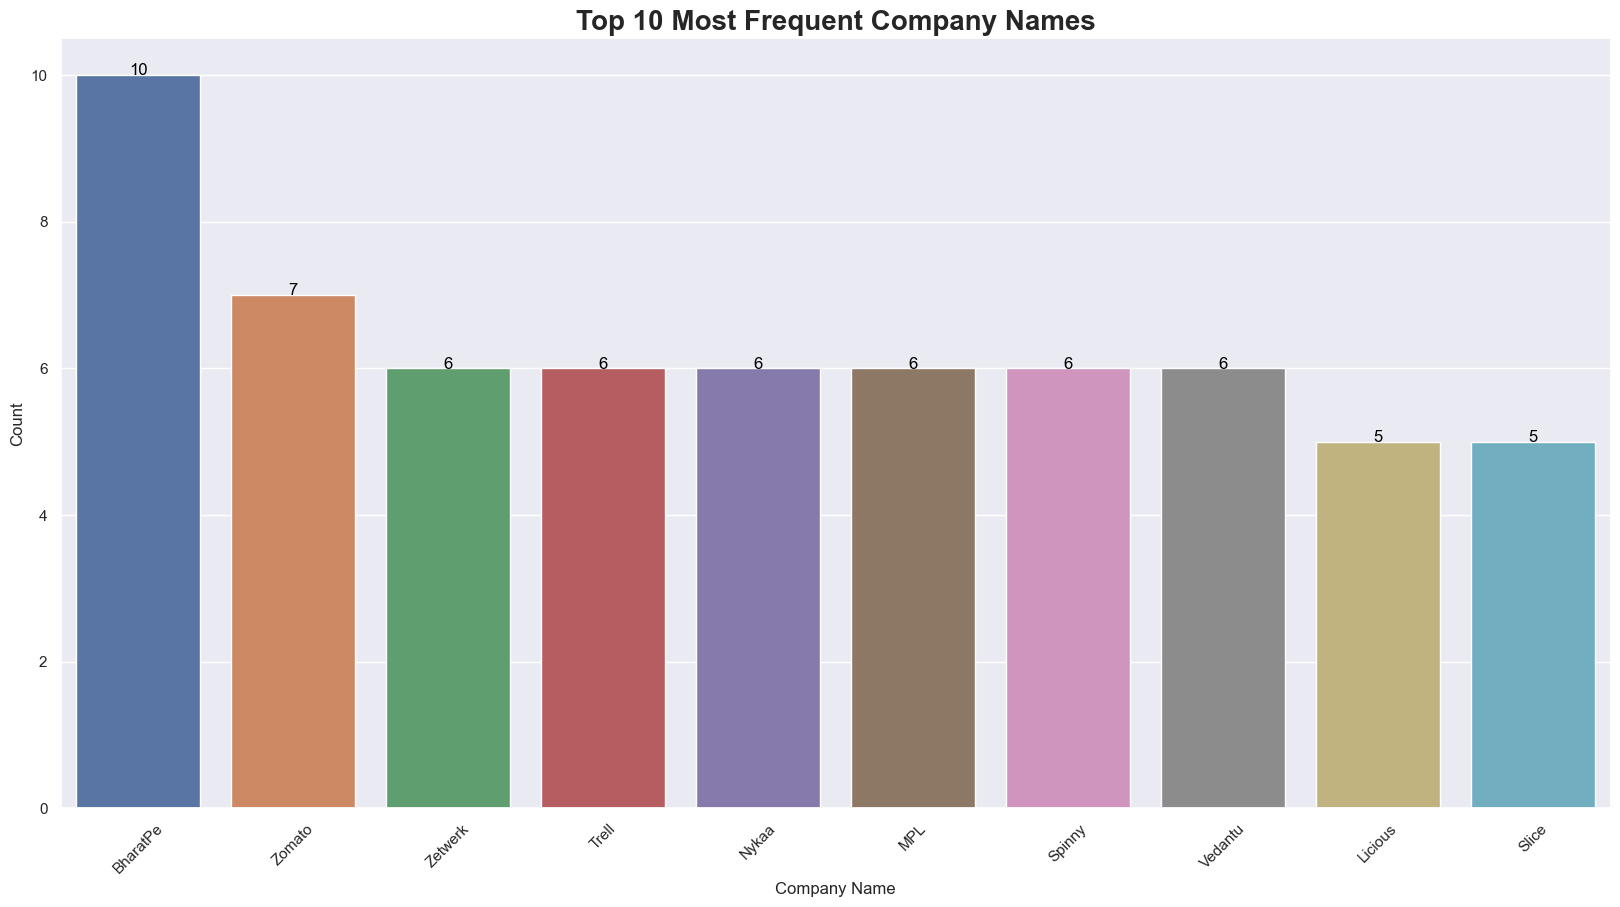

In [1213]:
# Invoke the plot_top_values() function on the column named 'Company Name' for its top 10 occuring companies

plot_top_values(df, 'Company Name', n=10)

It is conspicously outlined from the visualisation that, **BharatPe** tops Indian start-ups in obtaining fundings multiple times across the years under review.

**Zomato** then came as the second most frequently funded company across the years. Meanwhile, **Nykaa**, **Trell**, **Spinny**, **Vedantu**, **Zetwerk** and **MPL** obtained funding 6 times from 2018 through 2021. 

**Unacademy** and **BYJU**'S did obtain funding 5 times across the years under review.

#### **Sector**

Let's first get informed about some statistical attributes of the sector column

In [1214]:
# Get the statistical summary for the global_sector column as we have recategorised the sectors in that column.

df['global_sector'].describe()

count                   2839
unique                    46
top       Financial Services
freq                     332
Name: global_sector, dtype: object

The recategorized sector column has a total of 2839 rows with 48 unique sectors. '**Financial Services**' occurred most at 361 times. 

This indicates that, the financial services sector is the most dorminant in the Indian start-up ecosystem for the period under review.

Let's get the visual impressions about these sectors and their distribution.

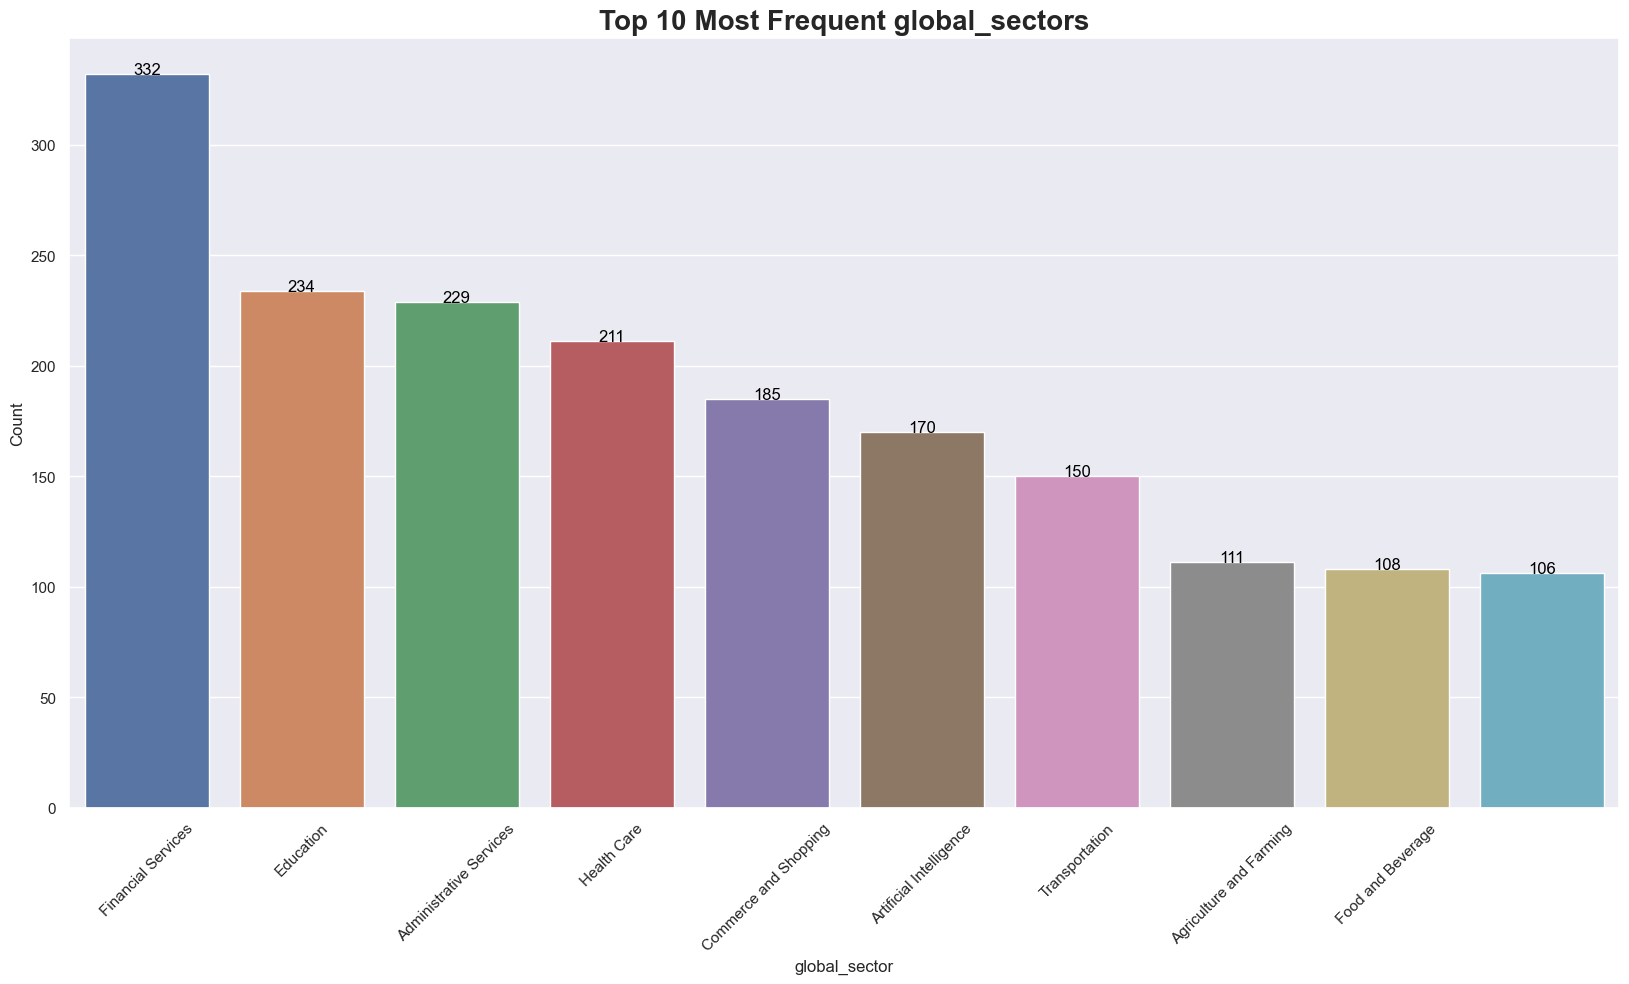

In [1215]:
# Get the top ten sectors interms of multiple funding for the period by invoking the plot_top_values() function.

plot_top_values(df, 'global_sector', n=10)

As clearly indicated by the diagram above, the most frequent sector in the Indian start-up ecosystem is the **Finance Sector**.<br>

This sector obtained 361 successful fundings throughout the period. This was followed by the **Education Sector** with 238 deals.<br> 

The third most frequent sector involved in funding was the **Health Care** sector. This sector succeded in 218 funding deals over the years of 2018 through to 2021. <br>

Meanwhile the **Administrative Services** and **Commerce and Shopping** sectors obtained 198 funding deals over the period. <br>

The rest of the sectors noted for securing high number of funding deals were Artificial Intelligence, Transportaion, Food and Beverages, Agriculture and Farming and Biotechnology. They secured 170, 167, 119, 111 and 92 respectively.                             

### **Stage**

Here, we analyse the stage column as a separate variable

In [1216]:
# Get some statistical summaries about the  stage column.

df.Stage.describe()

count         2839
unique          40
top       Series B
freq           525
Name: Stage, dtype: object

It appears the **Series B** funding stage was the most common funding stage at which Indian start-ups obtained funding. <br>It dorminated with 525 funding deals over the period of 2018 to 2021.

Let's get the visual impressions about these stages and their distribution per counts.

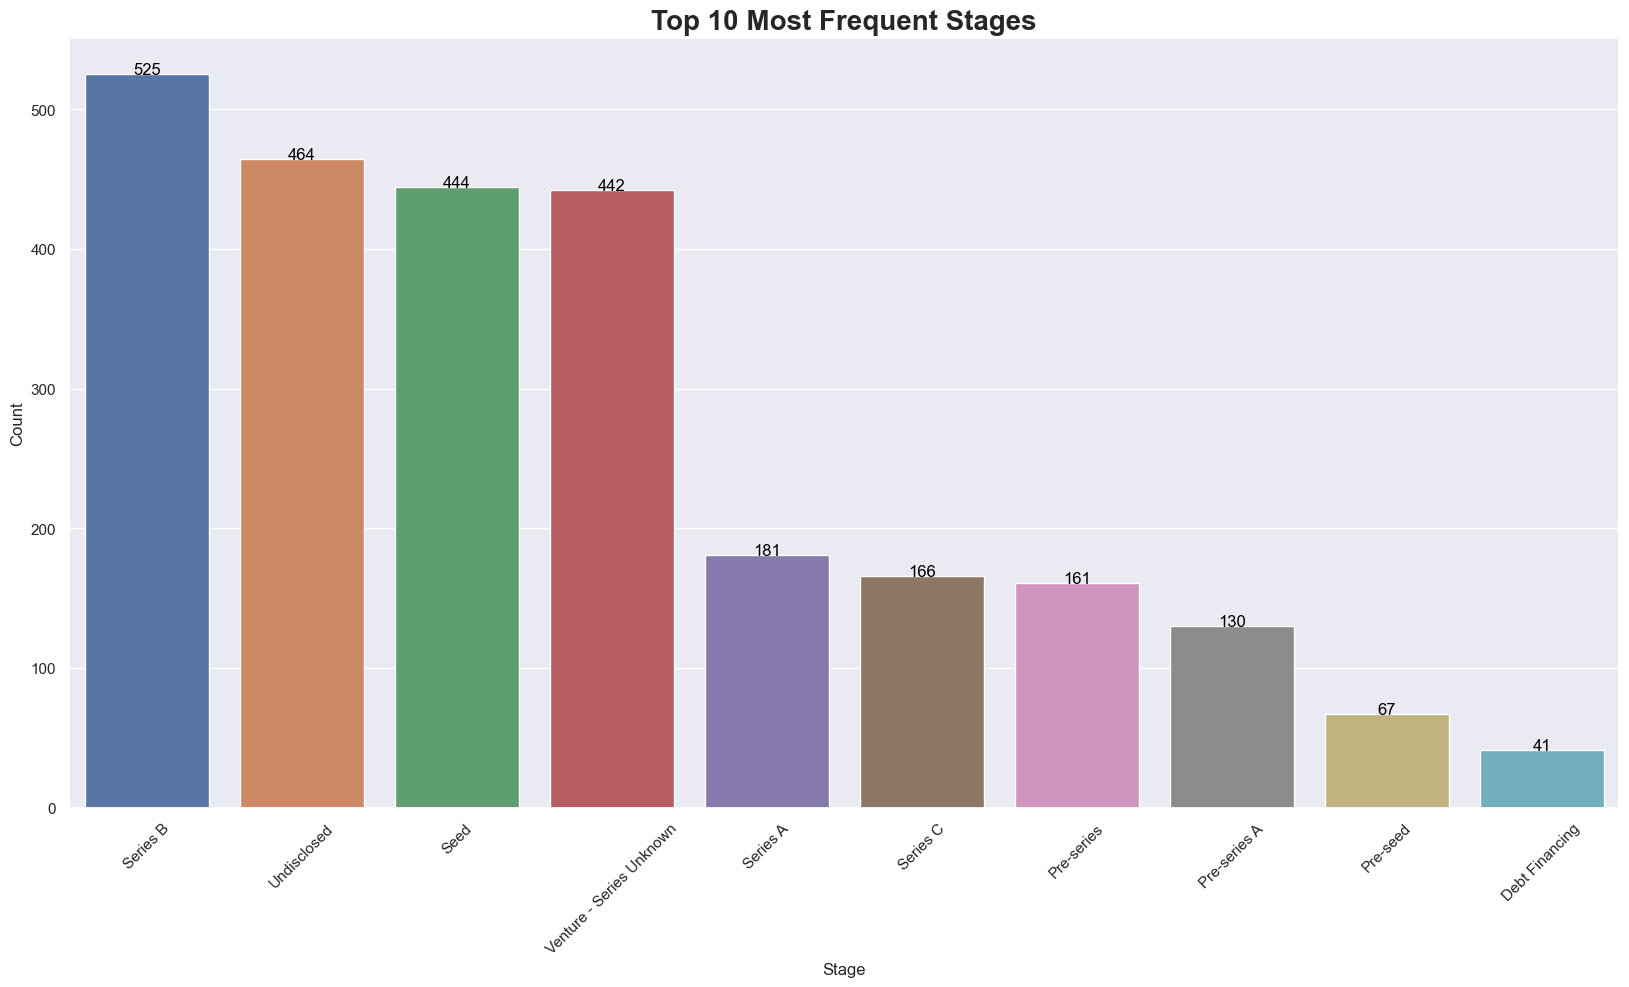

In [1217]:
# Get the top ten stages interms of multiple funding for the period by invoking the plot_top_values() function.

plot_top_values(df, 'Stage', n=10)

The diagram above depicts the fact that most funded stage in the Indian start-up funding ecosystem is the **Series B stage**. 361 successful fundings were obtained at this stage throughout the period. 

However, the number of start-ups in the said ecosystem whose funding stages were not disclosed are just 61 short of that of the top funded stage. 

Also, the third most stage at which funding was obtained among these said start-ups is the  **Seed** stage. Fundings were obtained at 444 times at this stage over the years of 2018 through to 2021. 

Meanwhile at the venture equity stage whose series are unknown, 441 funding deals were obtained then a drastic drop in number of deals occured with Series A, Series C, Pre-series, Pre-seed and the last for the top ten have been at the debt financing stage.  

### <center>**Multivariant Analysis**</center>

This form of exploratory data analysis seeks to find relationships among the numeric variables. Correlation heatmap is used in this regard.

Plotting the correlation heatmap for the **Amount**, **Year Funded** and **Founded** columns.

In [1226]:
df.columns

Index(['Company Name', 'Sector', 'Stage', 'Amount', 'HeadQuarter', 'Investor',
       'Founded', 'Year Funded', 'global_sector'],
      dtype='object')

In [1228]:
df[['Amount', 'Founded', 'Year Funded']].info()


<class 'pandas.core.frame.DataFrame'>
Index: 2839 entries, 0 to 2846
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Amount       2839 non-null   float64
 1   Founded      2315 non-null   float64
 2   Year Funded  2315 non-null   float64
dtypes: float64(3)
memory usage: 153.3 KB


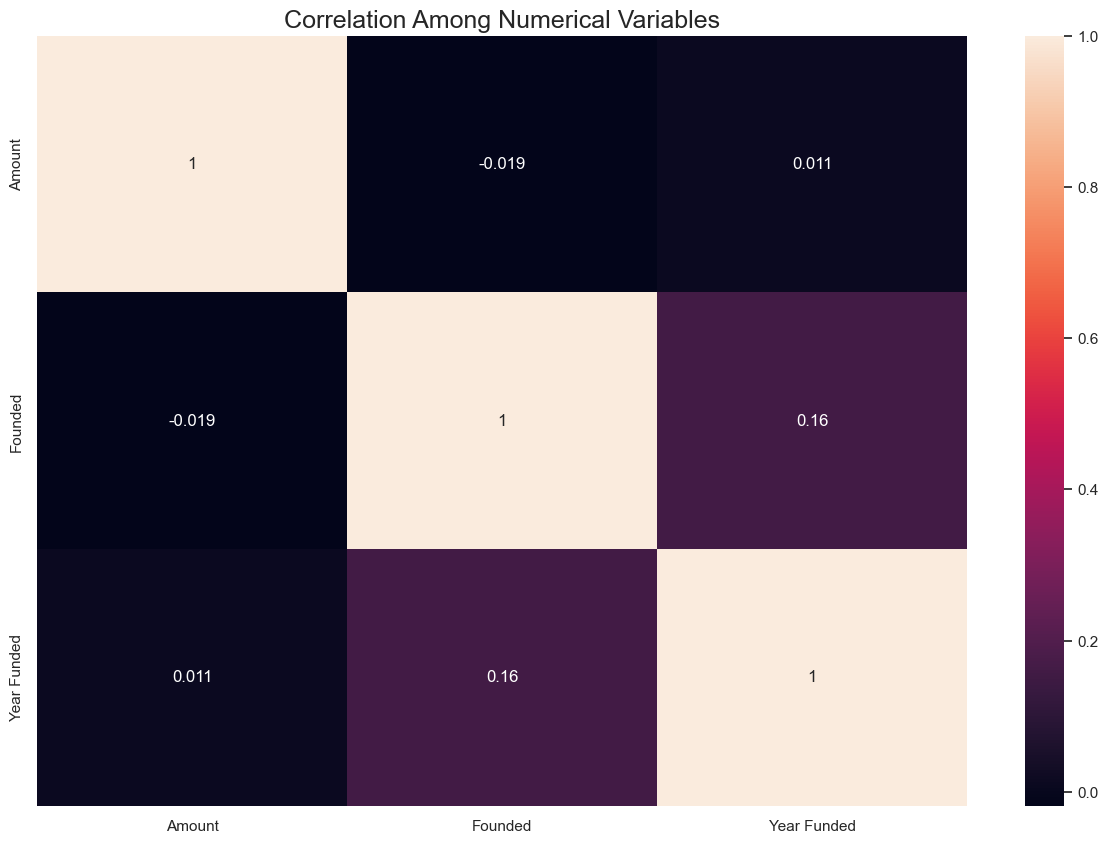

In [1229]:
#Inspecting correlation visually
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df[['Amount', 'Founded', 'Year Funded']].corr(), annot=True)
plt.title('Correlation Among Numerical Variables', fontsize=18);

From our correlation heatmap, there seem to be a very weak positive relationship between the year funded and funding amount received.

For founding years of companies and funding obtained, there exits a weak negative relationship.

This implies that, amount funded does not depend on the particular year in which funding was received. Also, it does not rely on the age of such companies.

## Answering the formulated 5 SMART questions:

### Question 1 
#### What is the overall trend in funding received by start ups in India from 2018-2021

In this, we visualize the total funding against the years.


(2018.0, 2022.0)

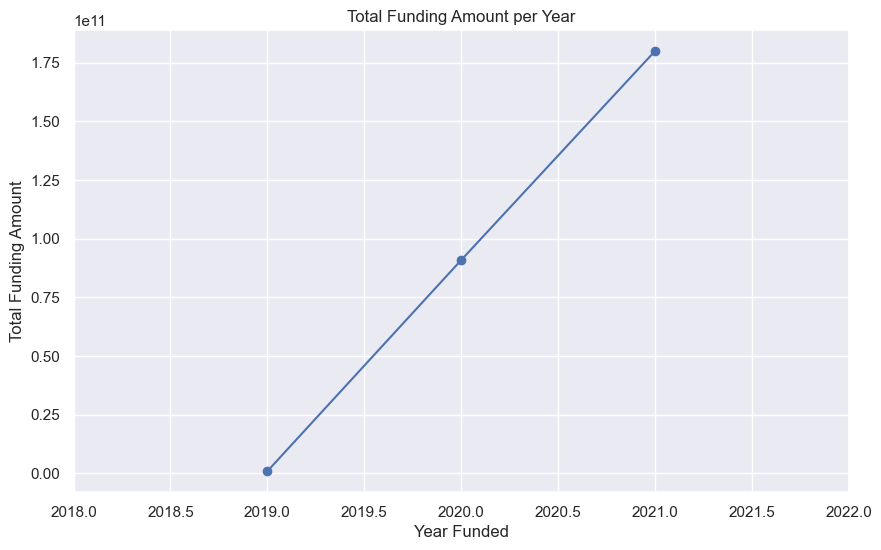

In [1230]:
# Calculate the total funding for each year
total_funding_per_year = df.groupby('Year Funded')['Amount'].sum()


# Extract the years and mean funding data for plotting
years = total_funding_per_year.index
total_funding = total_funding_per_year.values

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure

# Plot the mean funding against years using a line graph
plt.plot(years, total_funding, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year Funded')
plt.ylabel('Total Funding Amount')
plt.title('Total Funding Amount per Year')

# Optional: Customize the appearance (e.g., grid, axis limits, etc.)
plt.grid(True)
plt.xlim(min(years) - 1, max(years) + 1)  # Set the x-axis limits with some padding

In [1231]:
total_funding/1e9

array([  0.8594332,  90.8052186, 179.870565 ])

* For the period 2018 -2019, there was a downward trend in the amount of money funded into startups.
* From 2019 , the money funded has steadily increased.

### **Question 2**
#### Which industries or sectors have received the highest funding during this period?
We analyze this in terms of the total funding(sum) 

In [1232]:
# Group by 'Sector' and calculate total funding for each sector
total_funding_per_sector = df.groupby('global_sector')['Amount'].sum()
# Sort sectors based on total funding in descending order
sorted_sectors = total_funding_per_sector.sort_values(ascending=False)

# Get the top 5 sectors
top_10_sectors_overall = sorted_sectors.head(10)

# Create a table to display the top 5 sectors based on total funding
table = PrettyTable()
table.field_names = ['Sector', 'Total Funding']

for sector, funding in top_10_sectors_overall.items():
    table.add_row([sector, f"${funding:,.2f}"])

print(table)

+-------------------------+---------------------+
|          Sector         |    Total Funding    |
+-------------------------+---------------------+
|    Financial Services   | $156,762,044,228.00 |
|  Commerce and Shopping  |  $74,062,174,000.00 |
| Administrative Services |  $6,203,430,300.00  |
|        Education        |  $4,994,060,730.00  |
|      Transportation     |  $4,189,783,700.00  |
|    Food and Beverage    |  $2,839,579,800.00  |
|                         |  $2,822,294,600.00  |
|       Health Care       |  $2,630,699,000.00  |
|       Advertising       |  $1,812,033,000.00  |
|          Gaming         |  $1,675,070,000.00  |
+-------------------------+---------------------+


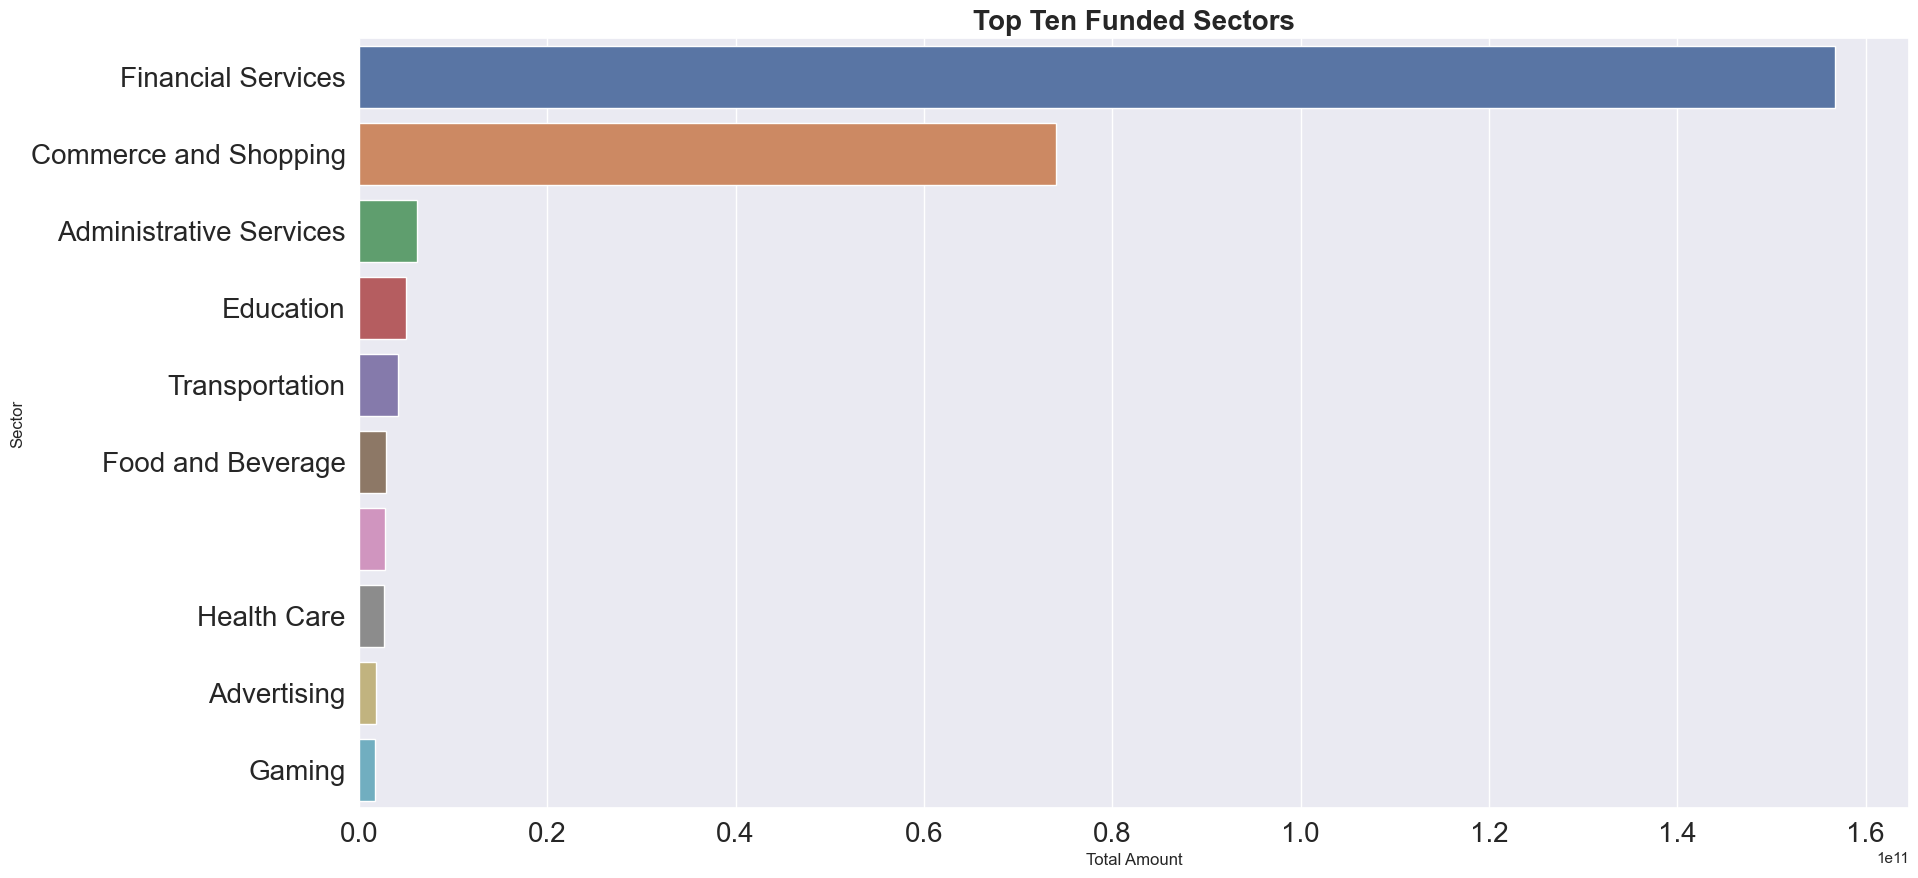

In [1233]:
# top 10 sectors

top_10 = pd.DataFrame(df.groupby('global_sector')['Amount'].sum().nlargest(10)).reset_index()
top_10.columns = ['Sector', 'Total Amount']
plt.figure(figsize=(20, 10))
sns.barplot(data=top_10, x='Total Amount', y= 'Sector',orient="h")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top Ten Funded Sectors', fontsize=20, weight='bold');

From the graph above,```Financial Services``` is the highest funded sector which is then followed by ```Commerce and Shopping``` and   ```Administrative Services```.

### Question 3
#### What is the distribution of startups across the cities in India?


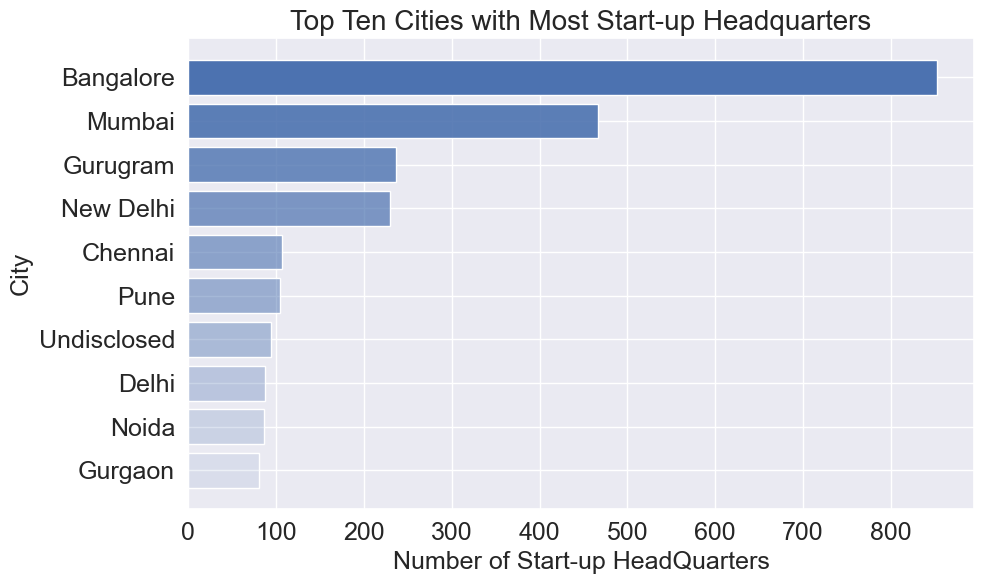

In [1234]:
# Construct a histogram to visualize the number of startups in each headquarters
startup_count_per_hq = df.groupby('HeadQuarter').size().reset_index(name='Startup Count')

# Sort the DataFrame by 'Startup Count' in descending order
startup_count_per_hq_sorted = startup_count_per_hq.sort_values(by='Startup Count', ascending=False)
startup_count_per_hq_sorted=startup_count_per_hq_sorted.head(10)[::-1]
# Construct a histogram to visualize the number of startups in each headquarters
# Define custom colors for each bar
custom_colors = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.1),\
     (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.2),\
         (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.3),\
             (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.4), \
                (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.5), \
                    (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.6), \
                        (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.7), \
                            (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.8),\
                                 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.9), \
                                    (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1.0)]

# Create the bar chart with custom colors
plt.figure(figsize=(10, 6))
plt.barh(startup_count_per_hq_sorted['HeadQuarter'], startup_count_per_hq_sorted['Startup Count'], color=custom_colors)

# Add labels and title
plt.xlabel('Number of Start-up HeadQuarters', fontsize=18)
plt.ylabel('City', fontsize=18)
plt.title('Top Ten Cities with Most Start-up Headquarters', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

# Display the plot
plt.show()


Most startups have their HeadQuarter in ```Bangalore``` city which is located in the Indian State of Karnataka followed by ```Mumbai``` city then ```Gurugram``` city and ```New Delhi``` city.

## Question 4

### What is the average funding amount received by start-ups in India during this period?

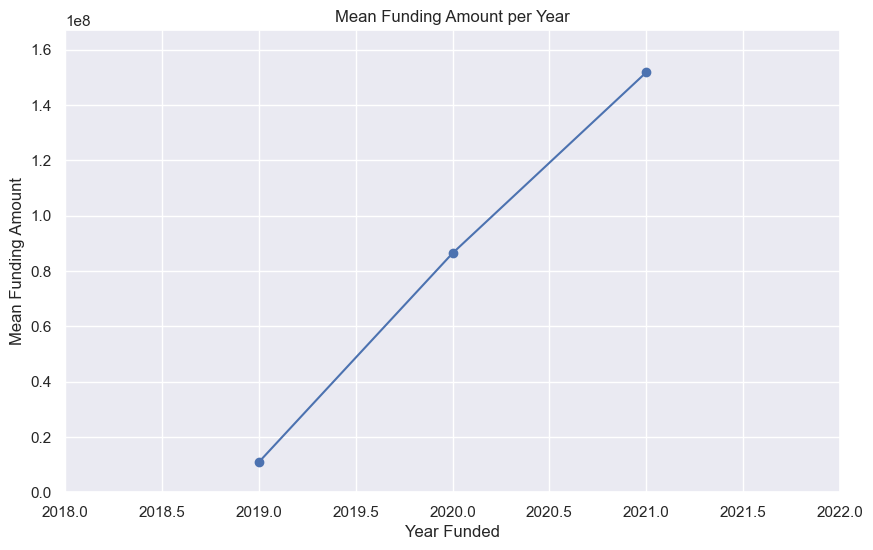

In [1235]:
# Calculate the mean funding for each year
mean_funding_per_year = df.groupby('Year Funded')['Amount'].mean()

# Extract the years and mean funding data for plotting
years = mean_funding_per_year.index
mean_funding = mean_funding_per_year.values

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure

# Plot the mean funding against years using a line graph
plt.plot(years, mean_funding, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year Funded')
plt.ylabel('Mean Funding Amount')
plt.title('Mean Funding Amount per Year')

# Optional: Customize the appearance (e.g., grid, axis limits, etc.)
plt.grid(True)
plt.xlim(min(years) - 1, max(years) + 1)  # Set the x-axis limits with some padding
plt.ylim(0, max(mean_funding) * 1.1)  # Set the y-axis limits with some padding

# Show the plot
plt.show()


For the period 2018 -2019 , there was a downward trajectory in the average money funded in startups but from 2019 there was a steady increase in the average money funded.

## Question 5

### Which Investors Funded Most Start-Ups Over the Period? 

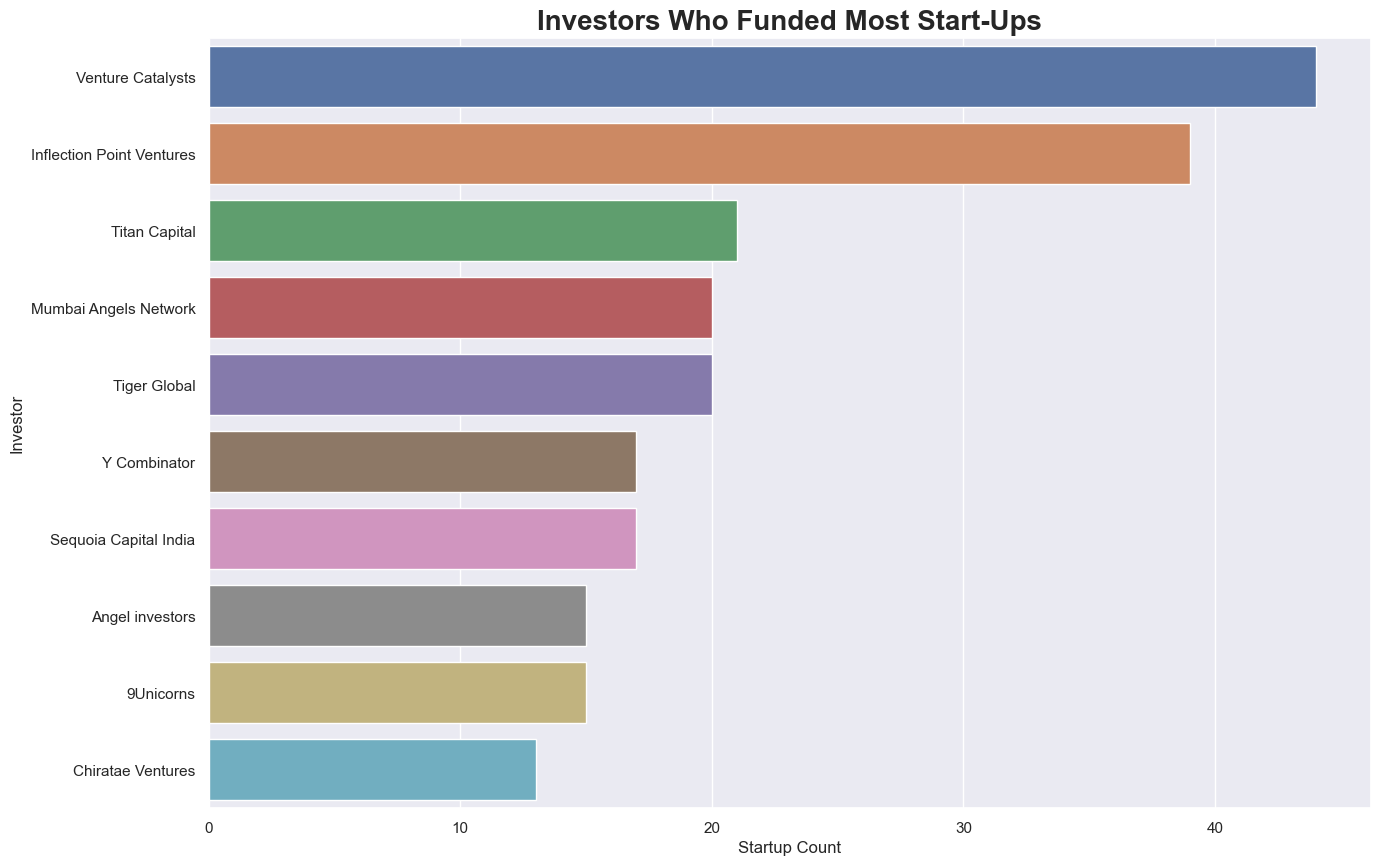

In [1236]:
# Filter out rows with 'unknown' or 'undisclosed' in the 'Investor' column
df_filtered = df[~df['Investor'].isin(['unknown', 'undisclosed', 'Unknown', 'Undisclosed'])]

# investors and the number of startups funded
investors_summary = df_filtered.groupby('Investor').size().reset_index(name='Startup Count')
investors_summary=investors_summary.sort_values(by='Startup Count',ascending=False)
investors_summary=investors_summary.head(10)
sns.barplot(data=investors_summary, x='Startup Count', y='Investor',orient="h")
plt.title('Investors Who Funded Most Start-Ups', fontsize=20, weight='bold');


In [1237]:
investors_summary

,Investor,Startup Count
1372,Venture Catalysts,44
587,Inflection Point Ventures,39
1315,Titan Capital,21
838,Mumbai Angels Network,20
1302,Tiger Global,20
1440,Y Combinator,17
1129,Sequoia Capital India,17
130,Angel investors,15
20,9Unicorns,15
312,Chiratae Ventures,13


* For most startups, their investors were either Unknown or Undisclosed.
* The leading investor that had invested in most startups was ```Venture Catalysts``` which was closely followed by ```Inflection Point Ventures```


## Question 6

### Top 5 Investors in terms of average amount funded to startups

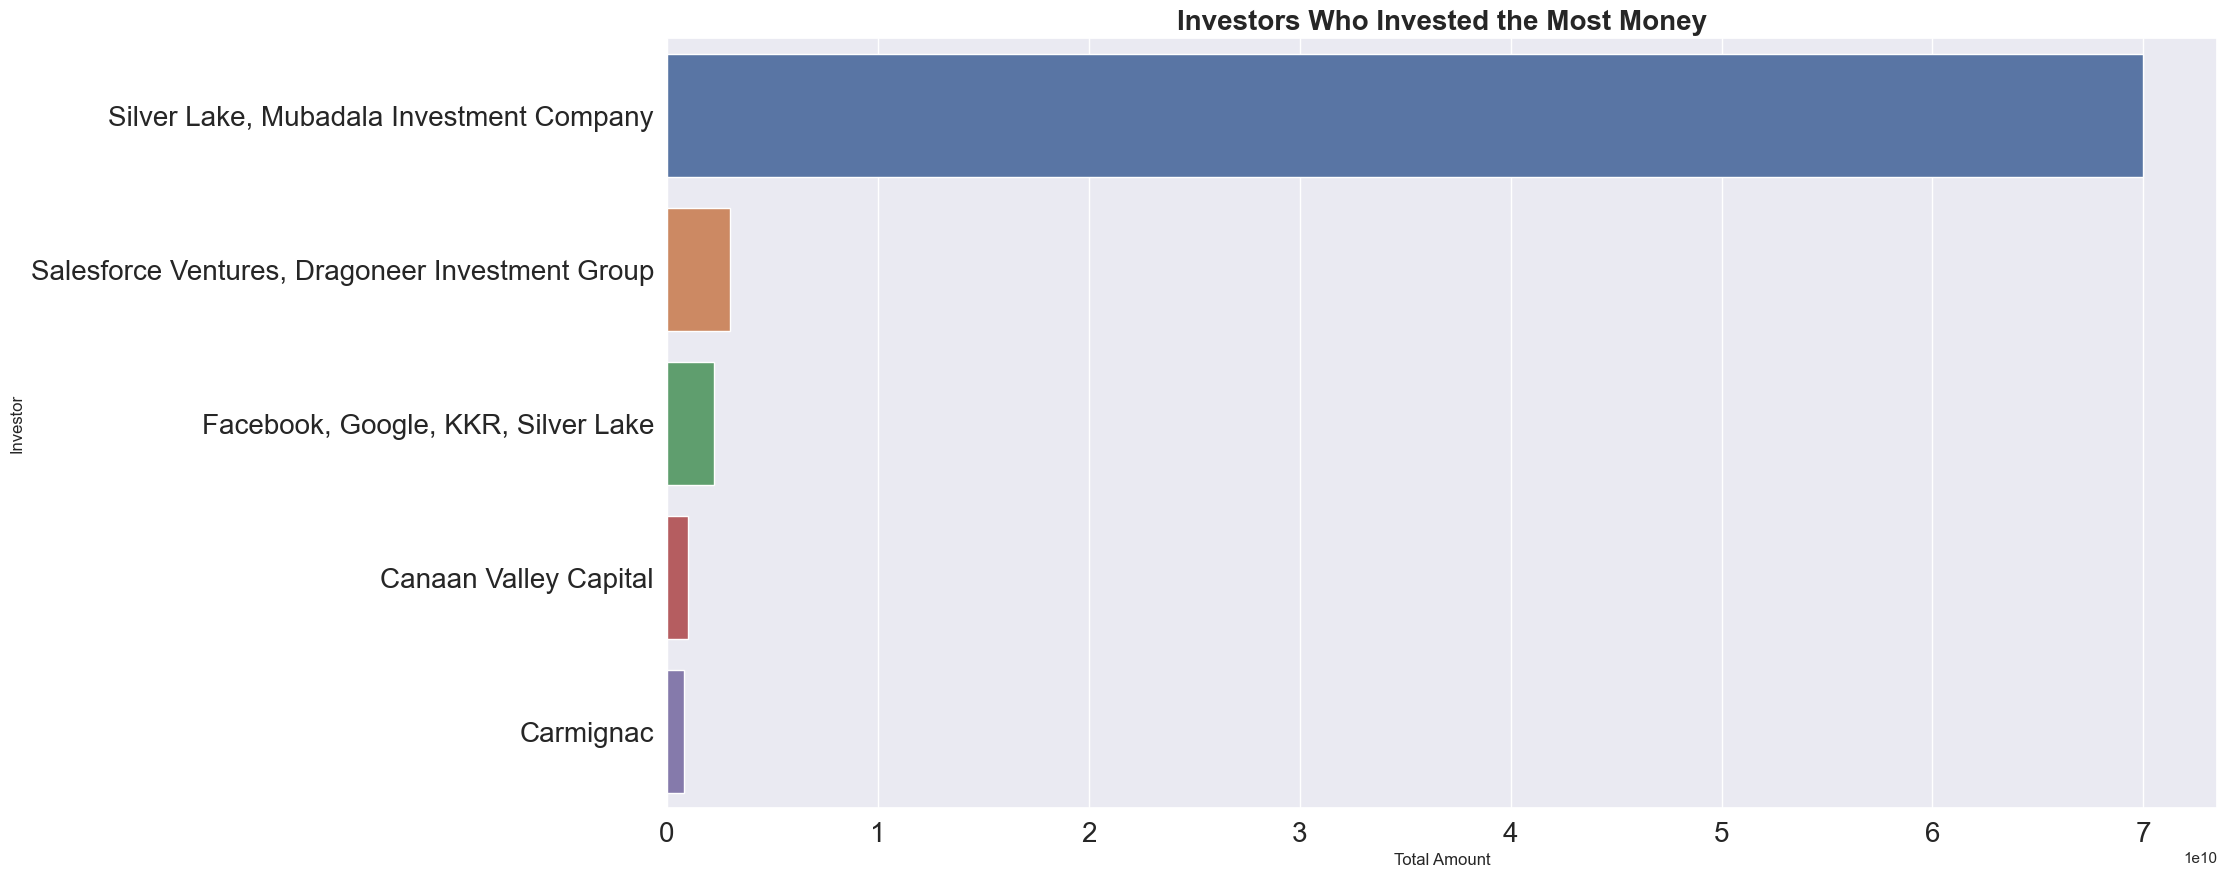

In [1238]:
top_5 = pd.DataFrame(df.groupby('Investor')['Amount'].mean().nlargest(5)).reset_index()
top_5.columns = ['Investor', 'Total Amount']
plt.figure(figsize=(20, 10))
sns.barplot(data=top_5, x='Total Amount', y= 'Investor',orient="h")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Investors Who Invested the Most Money', fontsize=20, weight='bold');

In [ ]:
top_5

```Silver Lake, Mubadala Investment Company``` is the leading investor that funds the highest average  amount into startups.

## Question 7

### At What Stages were Most Start-ups Funded?

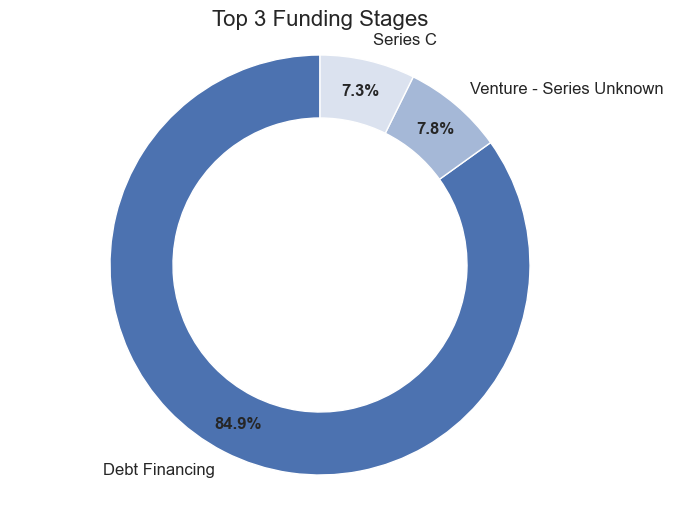

In [1239]:
df_filtered_stages = df[~df['Stage'].isin(['Undisclosed'])]
df_filtered_stages = df_filtered_stages.groupby(['Stage'])['Amount'].sum().nlargest(3)
labels = df_filtered_stages.index
sizes = df_filtered_stages.values

# Create the doughnut pie chart
plt.figure(figsize=(8, 6))
outer_colors = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1.0),\
     (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.5),\
         (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.2)]
inner_colors = ['white']
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
                                   colors=outer_colors, wedgeprops=dict(width=0.3), pctdistance=0.85)

# Add a circle at the center to create a doughnut shape
centre_circle = plt.Circle((0, 0), 0.5, color='white', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adjust text properties
plt.setp(autotexts, size=12, weight='bold')
plt.setp(texts, size=12)

# Add a title
plt.title('Top 3 Funding Stages', fontsize=16)

# Display the plot
plt.axis('equal')
plt.show()


In [1240]:
df_filtered_stages/1e9

Stage
Debt Financing             150.4
Venture - Series Unknown    13.8
Series C                    13.0
Name: Amount, dtype: float64

## Question 8

### Which 5 Cities Recorded Most Funding?

In [1241]:
city_funding = df.groupby('HeadQuarter')['Amount'].sum().nlargest(5)
city_funding_billion = city_funding / 1e9
city_funding_billion

HeadQuarter
Mumbai          229.5
Bangalore        21.7
Gurugram          5.0
Outside India     4.4
New Delhi         3.3
Name: Amount, dtype: float64

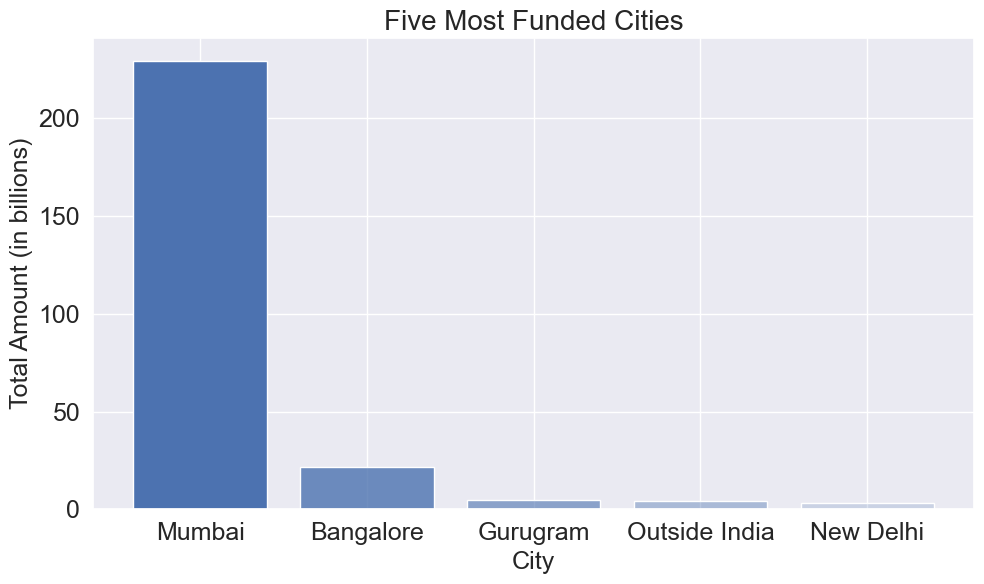

In [1242]:
# Construct a histogram to visualize the number of startups in each headquarters
city_funding = df.groupby('HeadQuarter')['Amount'].sum().nlargest(5)
city_funding_billion = city_funding / 1e9

# Construct a histogram to visualize the number of startups in each headquarters
# Define custom colors for each bar
custom_colors = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1.0),\
     (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.8),\
         (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.6),\
          (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.4),\
            (0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 0.2) ]

# Create the bar chart with custom colors
plt.figure(figsize=(10, 6))
plt.bar(city_funding.index, city_funding_billion, color=custom_colors)

# Add labels and title
plt.xlabel('City', fontsize=18)
plt.ylabel('Total Amount (in billions)', fontsize=18)
plt.title('Five Most Funded Cities', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

# Display the plot
plt.show()

<h1> Hypothesis Testing</h1>

### ANOVA is used to test the hypothesis at a significance level of 0.05 against the p-value.
#### If the p-value is lessthan the alpha level of significance we will reject the null hypothesis otherwise we dont reject.
#### To choose between the non parametric and parametric ANOVA , the distribution of the amount column is investigated. If it is normal we use the parametric one way ANOVA otherwise we use the the non prametric ANOVA known as Kruskal Wallis

### Hypothesis 1: <br>
```Null```: The funding received by start-ups in India has not demonstrated consistent upward trajectory over the years.<br>
```Alternate```: The funding received by start-ups in India has demonstrated a consistent upward trajectory over the years.

### Hypothesis 2: <br>
```Null```: There are no significant disparities in funding received by all sectors of the Indian startups. <br>
```Alternate```: The technology sectors receive higher funding compared to other industries.

### Hypothesis 3: <br>
```Null```: Situating a startup in a particular city does not influence funding.<br>
```Alternate```: Situating a startup in a particular city significantly affects funding.

### Hypothesis 4: <br>
```Null```: There are no significant disparities in funding received among different stages of the Indian startups. <br>
```Alternate```: During different stages the startups received different funding amounts.



In [1243]:
## setting the alpha 
alpha=0.05
#reading a sample of the data
df.sample(5)

,Company Name,Sector,Stage,Amount,HeadQuarter,Investor,Founded,Year Funded,global_sector
1863,infra.market,Construction,Series C,125000000.0,Thane,Tiger Global,2016.0,2021.0,Real Estate
1918,Keka HR,Information Technology & Services,Venture - Series Unknown,1600000.0,Hyderabad,Recur Club,2014.0,2021.0,Biotechnology
1383,Wellthy Therapeutics,Healthtech,Pre-series A,4000000.0,Bangalore,Saama Capital,2015.0,2020.0,Health Care
157,Any time Doctor,Software,Angel,1300000.0,Chennai,Unknown,NaN,NaN,Science and Engineering
323,Syncremedies Healthcare Pvt Ltd,"Alternative Medicine, Health Care",Seed,1300000.0,Bangalore,Unknown,NaN,NaN,Health Care


### Using shapiro wilk test to explore distribution of Amounts in each year.

In [1244]:
# Group the data by 'Year Funded'
grouped_data = df.groupby('Year Funded')['Amount']

# Perform Shapiro-Wilk test for each group
for year, group in grouped_data:
    statistic, p_value = stats.shapiro(group)
    print(f"Year: {year}")
    print("Shapiro-Wilk Test Results:")
    print("Statistic:", statistic)
    print("P-value:", p_value)
    if p_value < 0.05:
        print("The data does not follow a normal distribution.")
    else:
        print("The data follows a normal distribution.")
    print("-" * 30)

Year: 2019.0
Shapiro-Wilk Test Results:
Statistic: 0.7388180494308472
P-value: 1.5155211807726943e-10
The data does not follow a normal distribution.
------------------------------
Year: 2020.0
Shapiro-Wilk Test Results:
Statistic: 0.015582144260406494
P-value: 0.0
The data does not follow a normal distribution.
------------------------------
Year: 2021.0
Shapiro-Wilk Test Results:
Statistic: 0.012447178363800049
P-value: 0.0
The data does not follow a normal distribution.
------------------------------


## The distribution is not normal hence non parametric ANOVA is used

## <font color=green>Hypothesis 1, we will analyze the year-by-year funding amounts and calculate the average growth rate of funding.</font>


In [1245]:
## print each amount in each stage as a list and get the amount per stage as an array

amounts_per_year=df.groupby("Year Funded")['Amount'].apply(list)
amount_year = np.array(amounts_per_year)
amount_year


array([list([6300000.0, 28000000.0, 30000000.0, 6000000.0, 6000000.0, 6000000.0, 1000000.0, 20000000.0, 6000000.0, 22000000.0, 5000000.0, 140500.0, 6000000.0, 5000000.0, 15000000.0, 182700.0, 6000000.0, 5000000.0, 12000000.0, 11000000.0, 6000000.0, 15500000.0, 1500000.0, 5500000.0, 5000000.0, 12000000.0, 2500000.0, 30000000.0, 140000.0, 6000000.0, 20000000.0, 49400000.0, 32000000.0, 26000000.0, 150000.0, 400000.0, 2000000.0, 8000000.0, 1500000.0, 100000.0, 6000000.0, 50000000.0, 6000000.0, 4000000.0, 30000000.0, 4000000.0, 1500000.0, 1000000.0, 6000000.0, 6000000.0, 26000000.0, 5500000.0, 6800000.0, 6000000.0, 36000000.0, 5700000.0, 50000000.0, 2000000.0, 5000000.0, 6000000.0, 100000.0, 5500000.0, 25000000.0, 600000.0, 4000000.0, 1500000.0, 6000000.0, 6000000.0, 220000.0, 2800000.0, 2100000.0, 7000000.0, 4800000.0, 1000000.0, 1000000.0, 20000000.0, 5000000.0, 50000000.0, 33000000.0]),
       list([200000.0, 100000.0, 3000000.0, 400000.0, 340000.0, 600000.0, 600000.0, 3000000.0, 4500000

In [1246]:

# Perform one-way ANOVA
test_statistic, p_value = stats.kruskal(*amount_year)
print(f"P_value: {p_value}")


# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis concluding that there are significant disparities in funding received during different years.")
else:
    print("Fail to reject the null hypothesis concluding there is no significant evidence of disparities in funding among the years.")

P_value: 0.00012495441921715173
Reject the null hypothesis concluding that there are significant disparities in funding received during different years.


### <font color=green>Conclusion:  There are significant disparities in funding received during different years.<font>

In [1247]:
# Extract "Year Funded" as an array and convert it to strings
year_funded_array = amounts_per_year.index.astype(str).to_numpy()

# Perform Dunn's test with Bonferroni correction
dunn_result = posthoc_dunn(amount_year, p_adjust='bonferroni')

# Modify the Dunn's test result to include custom group names
dunn_result.index = year_funded_array
dunn_result.columns = year_funded_array

print(dunn_result)

        2019.0  2020.0  2021.0
2019.0     1.0     0.0     0.1
2020.0     0.0     1.0     0.0
2021.0     0.1     0.0     1.0


### Print out what are significant differences among the years

In [1248]:

def group_comparisons_by_pvalues(posthoc_result, alpha=0.05):
    
    is_significant = []  # p < alpha
    not_significant = []  # p > or = alpha
    
    for group1 in posthoc_result.index:
        for group2 in posthoc_result.columns:
            p_value = posthoc_result.loc[group1, group2]
            if p_value < alpha :
                is_significant.append((group1, group2))
            else:
                not_significant.append((group1, group2))
    
    return is_significant, not_significant

# Group the comparisons based on p-values
is_significant, not_significant = group_comparisons_by_pvalues(dunn_result, alpha=0.05)

# Print the results
print("Significant Differences:")
print(is_significant)


print("\nNot Significant Differences:")
print(not_significant)


Significant Differences:
[('2019.0', '2020.0'), ('2020.0', '2019.0'), ('2020.0', '2021.0'), ('2021.0', '2020.0')]

Not Significant Differences:
[('2019.0', '2019.0'), ('2019.0', '2021.0'), ('2020.0', '2020.0'), ('2021.0', '2019.0'), ('2021.0', '2021.0')]


### The significant differences in funding are between years ('2018', '2020'), ('2019', '2020'), ('2020', '2018'), ('2020', '2019'), ('2020', '2021'), ('2021', '2020')

## <font color=green>Hypothesis 2: Categorize start-ups based on industry and compare the funding amounts received by each sector.</font>


In [1249]:
## print each amount in each sector as a list and get the amount per sector as an array

amounts_per_sector=df.groupby("global_sector")['Amount'].apply(list)
amount_sector = np.array(amounts_per_sector)
#amount_sector

In [1250]:
# Perform one-way ANOVA
test_statistic, p_value = stats.kruskal(*amount_sector)
print(f"P_value: {p_value}")


# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis concluding that there are significant disparities in funding received in different sectors.")
else:
    print("Fail to reject the null hypothesis concluding there is no significant evidence of disparities in funding among the sectors.")

P_value: 9.754203860965568e-16
Reject the null hypothesis concluding that there are significant disparities in funding received in different sectors.


### <font color=green> Conclusion : There are significant disparities in funding received in different sectors.</font>

### <font color=green>Investigating diffference between technology and other sectors funding</font>

In [1251]:

# Empty lists to store funding amounts for the "Tech" sector and other sectors
tech_sector_amounts = []
other_sector_amounts = []

# Loop through the DataFrame and group funding amounts based on sector
for index, row in df.iterrows():
    if 'Artificial Intelligence' or 'tech' or 'Data' in row['Sector']:
        tech_sector_amounts.append(row['Amount'])
    else:
        other_sector_amounts.append(row['Amount'])

# Perform Mann-Whitney U test
test_statistic, p_value = stats.kruskal(tech_sector_amounts, other_sector_amounts)

# Set the significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in funding amounts between the Tech sector and other sectors.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of a difference in funding amounts between the Tech sector and other sectors.")


Fail to reject the null hypothesis. There is no significant evidence of a difference in funding amounts between the Tech sector and other sectors.


### <font color=green>Hypothesis 3, Examine the distribution of start-ups across cities and deduce which cities harbour most highly-funded start-ups.</font>


In [1252]:
## print each amount in each city as a list and get the amount per city as an array

amounts_per_city=df.groupby("HeadQuarter")['Amount'].apply(list)
amount_city = np.array(amounts_per_city)
amount_city

array([list([1800000.0, 1000000.0, 1000000.0, 1000000.0, 300000.0, 200000.0]),
       list([1300000.0, 1300000.0, 1300000.0, 250000.0, 1300000.0, 1300000.0, 140500.0, 3000000.0, 3000000.0, 18000000.0, 3000000.0, 16076000.0, 2000000.0, 11363000.0, 3000000.0, 2000000.0, 2000000.0, 280000.0, 30000000.0, 500000.0, 300000.0, 4500000.0, 155000.0, 1500000.0, 1000000.0, 125000000.0, 5000000.0, 30000000.0, 200000.0]),
       list([22000000.0]), list([1300000.0]), list([200000.0]),
       list([1300000.0]),
       list([1300000.0, 20000000.0, 2000000.0, 1000000.0]),
       list([1300000.0]),
       list([250000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 13400000.0, 1300000.0, 1300000.0, 1300000.0, 9000000.0, 1000000.0, 4000000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1800000.0, 1300000.0, 300000.0, 6830000.0, 1000000.0, 4000000.0, 500000.0, 1300000.0, 1300

In [1253]:
# Perform one-way ANOVA
test_statistic, p_value = stats.kruskal(*amount_city)
print(f"P_value: {p_value}")


# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis concluding that there are significant disparities in funding received in cities.")
else:
    print("Fail to reject the null hypothesis concluding there is no significant evidence of disparities in funding among the cities.")

P_value: 3.833981701538612e-14
Reject the null hypothesis concluding that there are significant disparities in funding received in cities.


### <font color=green>Conclusion : There are significant disparities in funding received in cities.</font>

### Investigate the differences

In [1254]:
# Extract "Year Funded" as an array and convert it to strings
city_funded_array = amounts_per_city.index.astype(str).to_numpy()

# Perform Dunn's test with Bonferroni correction
dunn_result = posthoc_dunn(amount_city, p_adjust='bonferroni')

# Modify the Dunn's test result to include custom group names
dunn_result.index = city_funded_array
dunn_result.columns = city_funded_array

#dunn_result

In [1255]:

def group_comparisons_by_pvalues(posthoc_result, alpha=0.05):
    
    is_significant = []  # p < alpha
    not_significant = []  # p > or = alpha
    
    for group1 in posthoc_result.index:
        for group2 in posthoc_result.columns:
            p_value = posthoc_result.loc[group1, group2]
            if p_value < alpha :
                is_significant.append((group1, group2))
            else:
                not_significant.append((group1, group2))
    
    return is_significant, not_significant

# Group the comparisons based on p-values
is_significant, not_significant = group_comparisons_by_pvalues(dunn_result, alpha=0.05)

# Print the results
print("Significant Differences:")
print(is_significant)


print("\nNot Significant Differences:")
print(not_significant)


Significant Differences:
[('Bangalore', 'Bengaluru'), ('Bangalore', 'Hyderabad'), ('Bengaluru', 'Bangalore'), ('Bengaluru', 'Gurugram'), ('Bengaluru', 'Outside India'), ('Bengaluru', 'Undisclosed'), ('Gurgaon', 'Outside India'), ('Gurugram', 'Bengaluru'), ('Gurugram', 'Hyderabad'), ('Hyderabad', 'Bangalore'), ('Hyderabad', 'Gurugram'), ('Hyderabad', 'Outside India'), ('New Delhi', 'Outside India'), ('Outside India', 'Bengaluru'), ('Outside India', 'Gurgaon'), ('Outside India', 'Hyderabad'), ('Outside India', 'New Delhi'), ('Undisclosed', 'Bengaluru')]

Not Significant Differences:
[('Ahmadabad', 'Ahmadabad'), ('Ahmadabad', 'Ahmedabad'), ('Ahmadabad', 'Alleppey'), ('Ahmadabad', 'Alwar'), ('Ahmadabad', 'Ambernath'), ('Ahmadabad', 'Anand'), ('Ahmadabad', 'Andheri'), ('Ahmadabad', 'Azadpur'), ('Ahmadabad', 'Bangalore'), ('Ahmadabad', 'Bangalore City'), ('Ahmadabad', 'Banglore'), ('Ahmadabad', 'Beijing'), ('Ahmadabad', 'Belgaum'), ('Ahmadabad', 'Bengaluru'), ('Ahmadabad', 'Bhilwara'), ('Ahm

### Conclusion: There are significant differences among these cities ('Bangalore', 'Hyderabad'), ('Hyderabad', 'Bangalore'), ('Hyderabad', 'Outside India'), ('Outside India','Hyderabad')

## <font color=green>Hypothesis 4: Categorize start-ups based on stages and compare the funding amounts received by each stage.</font>


In [1256]:
## print each amount in each stage as a list and get the amount per stage as an array

amounts_per_stage=df.groupby("Stage")['Amount'].apply(list)
amount_stage = np.array(amounts_per_stage)
amount_stage

array([list([2000000.0, 1300000.0, 1300000.0, 1000000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 500000.0, 1300000.0, 500000.0, 1300000.0, 1300000.0, 1300000.0, 50000.0, 1300000.0, 1300000.0, 1300000.0, 250000.0, 1300000.0, 1300000.0, 100000.0, 3500000.0, 250000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 700000.0, 1300000.0, 1300000.0]),
       list([3000000.0, 3000000.0, 264000.0, 3000000.0]),
       list([3000000.0, 2000000.0, 1000000.0, 3000000.0, 500000.0, 8000000.0, 3000000.0, 500000.0, 500000.0]),
       list([1300000.0, 1300000.0, 65000000.0, 2700000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0]),
       list([7800000.0, 100000000.0, 5000000.0, 75000000.0, 6000000.0, 4000000.0, 2000000.0, 5000000.0, 4000000.0, 10000000.0, 20000000.0, 2000000.0, 1300000.0, 2000000.0, 8090000.0, 360000.0, 5000000.0, 682000.0]),
       list([1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000.0, 1300000

In [1257]:
# Perform one-way ANOVA
test_statistic, p_value = stats.kruskal(*amount_stage)
print(f"P_value: {p_value}")


# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis concluding that there are significant disparities in funding received during different stages.")
else:
    print("Fail to reject the null hypothesis concluding there is no significant evidence of disparities in funding among the stages.")

P_value: 4.481422521599231e-124
Reject the null hypothesis concluding that there are significant disparities in funding received during different stages.


### <font color=green>Conclusion: There are significant disparities in funding received during different stages</font>

### Find where the differences are

In [1258]:
# Extract "Year Funded" as an array and convert it to strings
stage_funded_array = amounts_per_stage.index.astype(str).to_numpy()

# Perform Dunn's test with Bonferroni correction
dunn_result = posthoc_dunn(amount_stage, p_adjust='bonferroni')

# Modify the Dunn's test result to include custom group names
dunn_result.index = stage_funded_array
dunn_result.columns = stage_funded_array

#dunn_result

In [1259]:

def group_comparisons_by_pvalues(posthoc_result, alpha):
    
    is_significant = []  # p < alpha
    not_significant = []  # p > or = alpha
    
    for group1 in posthoc_result.index:
        for group2 in posthoc_result.columns:
            p_value = posthoc_result.loc[group1, group2]
            if p_value < alpha :
                is_significant.append((group1, group2))
            else:
                not_significant.append((group1, group2))
    
    return is_significant, not_significant

# Group the comparisons based on p-values
is_significant, not_significant = group_comparisons_by_pvalues(dunn_result, 0.05)

# Print the results
print("Significant Differences:")
print(is_significant)


print("\nNot Significant Differences:")
print(not_significant)


Significant Differences:
[('Angel', 'Debt'), ('Angel', 'Debt Financing'), ('Angel', 'Series A'), ('Angel', 'Series B'), ('Angel', 'Series C'), ('Angel', 'Series D'), ('Angel', 'Series E'), ('Angel', 'Undisclosed'), ('Angel', 'Unknown'), ('Angel', 'Venture - Series Unknown'), ('Bridge', 'Series C'), ('Bridge', 'Series D'), ('Corporate Round', 'Series C'), ('Debt', 'Angel'), ('Debt', 'Pre-seed'), ('Debt', 'Seed'), ('Debt Financing', 'Angel'), ('Debt Financing', 'Pre-seed'), ('Debt Financing', 'Seed'), ('Debt Financing', 'Series C'), ('Pre-Seed', 'Series C'), ('Pre-seed', 'Debt'), ('Pre-seed', 'Debt Financing'), ('Pre-seed', 'Series A'), ('Pre-seed', 'Series B'), ('Pre-seed', 'Series C'), ('Pre-seed', 'Series D'), ('Pre-seed', 'Series E'), ('Pre-seed', 'Undisclosed'), ('Pre-seed', 'Unknown'), ('Pre-seed', 'Venture - Series Unknown'), ('Pre-series', 'Series A'), ('Pre-series', 'Series B'), ('Pre-series', 'Series C'), ('Pre-series', 'Series D'), ('Pre-series', 'Series E'), ('Pre-series', 'U